In [3]:
#!/usr/bin/env python

### TOOLKITS ###
import numpy as np # Numpy Numerical Toolkit
import skbio as sk # SciKit-Bio Toolkit
import scipy as sp  # Scipy Scientific Toolkit
from scipy.cluster.hierarchy import linkage # Scipy Tree Linkage Function

### DATA STRUCTURES ###
import pandas as pd # Pandas Dataframes
from IPython.display import display
import biom # Biom Format Used for Microbiome Analyses
from skbio.tree import TreeNode # SciKit - Bio TreeNode object to Store Phylogeny
import ete3 as ete # Ete3 tree viewing tools
from skbio.stats.distance import DistanceMatrix # SciKit-Bio DistanceMatrix Object
from skbio.stats.distance import DissimilarityMatrix # SciKit-Bio DissimilarityMatrix Object

### PLOTTING ###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### FUNCTIONALITY ###
import os # Tool for terminal and operating system type calls
import glob # Tool to Regex Search for Files
import random       # Generate Random Values
random.seed(54321)  # Set Random Seed for Reproducibility
import itertools # Iterate through data
from IPython.core.interactiveshell import InteractiveShell # Set Notebook to Evaulate Variables on All Lines (not just last line)
InteractiveShell.ast_node_interactivity = "all"
from IPython.utils import io # Used to capture the output of cells and write to file

### PRINT DATE AND TIME ###
import time
print (' - Date: '+time.strftime("%d/%m/%Y")+' '+time.strftime("%H:%M:%S")+' - ')

### Import Toolkits ###
from brooks import *

 - Date: 08/08/2017 13:38:32 - 


<h1 style="text-align:Center; color:orange;">- Brooks Tools -</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h4 style="text-align:center; color:blue;">Andrew W. Brooks</h4>
<h4 style="text-align:center; color:blue;">Vanderbilt Genetics Institute</h4>
<h4 style="text-align:center; color:blue;">andrew.w.brooks(at)vanderbilt.edu</h4>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h4 style="text-align:center; color:black;">Released under MIT License</h4>
<h4 style="text-align:center; color:black;">Copyright (c) 2017 Andrew W. Brooks</h4>
<h4 style="text-align:center; color:black;">Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. The software is provided "as is", without warranty of any kind, express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose and noninfringement. In no event shall the authors or copyright holders be liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, arising from, out of or in connection with the software or the use or other dealings in the software.</h4>
<h4 style="text-align:center; color:red;"></h4>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h1 style="text-align:center; color:orange;"> - Primary Input -</h1>

    This toolkit uses a dictionary named varDict to store objects flexibly. 
    To assign objects to varDict simply type varDict['your_name_here'] = ...
    There are some general keys I have been using for certain types of objects:
       varDict['csv'] for CSV files into a Pandas Dataframe
       varDict['tsv'] for TSV files into a Pandas Dataframe
       varDict['bt']  JSON file into BIOM Table
       varDict['mp']  QIIME Format Mapping File into Pandas Dataframe (sets #SampleID to index)
       varDict['rt']  Rarefied BIOM Table
       varDict['rts'] Directory of Rarefied BIOM Tables into a List
       varDict['dm']  Distance Matrix into DistanceMatrix
       varDict['dms'] Distance Matrices Found Using GLOB into List
       varDict['tre'] Newick Dendrogram into TreeNode
       
   Below are some tools to help import these items easily:

<h3 style="text-align:center; color:blue;"> - Input Files from Paths -</h3>
<h4 style="text-align:center; color:black;"> A general input pipeline that can import a range of objects from provided paths.</h4>

In [ ]:
### Input Variables ###
dir_path = '/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/' # Source or Output Directory
csv_path = None # Path to CSV File
tsv_path = None # Path to TSV File
biom_path = '/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data/2_Qiime_Filtering/20_2_filter_country.biom' # Path to Biom Table File
map_path = '/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data/3_Community_Filtering/1_1_qc_1000_map.txt' # Path to Dataframe CSV QIIME Format Mapping File
rare_dir = None # Path to Directory of Rarefied Biom Tables
dist_matrix=None # Path to Individual Distance Matrix
dist_matrices = None # Path to Directory of Distance Matrices
tre_path = '/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data/3_Community_Filtering/1_2_qc_1000_tree.tre' # Path to Dendrogram or Phylogeny
##################################################################################
### Load Files from Provided Paths ###    
varDict = pipe_input(csv_path=csv_path,           # varDict['csv'] = pd_in(path=csv_path,sep=',')
                     tsv_path=tsv_path,           # varDict['tsv'] = pd_in(path=tsv_path,sep='\t')
                     biom_path=biom_path,         # varDict['bt']  = biom_in(biom_path)
                     map_path=map_path,           # varDict['mp']  = mp = pd_in(map_path); varDict['mp'] = pd_setindex(mp, '#SampleID')
                     rare_dir=rare_dir,           # varDict['rts']  = for curIdx, curTable in enumerate(glob.glob(rare_dir+'/*')): varDict['rt'].append(biom_in(curTable))
                     dist_matrix=dist_matrix,     # varDict['dm']  = DistanceMatrix.read(dist_matrix)
                     dist_matrices=dist_matrices, # varDict['dms'] = for curIdx, curDM in enumerate(glob.glob(dist_matrices+"/*")): varDict['dms'].append(DistanceMatrix.read(curDM))
                     tre_path=tre_path)           # varDict['tre'] = tree_in(tre_path)
# Print Keys #
print(' - Dictionary Keys - ');print(varDict.keys())

<h3 style="text-align:center; color:blue;"> - Read Processed BIOM Project -</h3>

In [4]:
### Input Variables ###
dir_path   = '/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/' # Source or Output Directory
betaMetric = 'unweighted_unifrac'
rareDepth  = 1000
##################################################################################
biom_path     = dir_path+'1_0_biom.biom' # Path to Biom Table File
map_path      = dir_path+'1_3_alpha_map_'+str(rareDepth)+'.txt' # Path to Dataframe CSV QIIME Format Mapping File
rare_dir      = dir_path+'1_2_rarefaction_'+str(rareDepth)+'/rarefaction*.biom' # Path to Directory of Rarefied Biom Tables
dist_matrix   = dir_path+'1_4_beta/'+betaMetric+'_'+str(rareDepth)+'/consensus.txt' # Path to Individual Distance Matrix
dist_matrices = dir_path+'1_4_beta/'+betaMetric+'_'+str(rareDepth)+'/dm_*.txt' # Path to Directory of Distance Matrices
tre_path      = dir_path+'1_0_tree.tre' # Path to Dendrogram or Phylogeny
##################################################################################
### Load Files from Provided Paths ###    
varDict = pipe_input(dir_path=dir_path,            # varDict['dir']  = directory
                     biom_path=biom_path,         # varDict['bt']   = biom_in(biom_path)
                     map_path=map_path,           # varDict['mp']   = mp = pd_in(map_path); varDict['mp'] = pd_setindex(mp, '#SampleID')
                     rare_dir=rare_dir,           # varDict['rts']  = for curIdx, curTable in enumerate(glob.glob(rare_dir+'/*')): varDict['rt'].append(biom_in(curTable))
                     dist_matrix=dist_matrix,     # varDict['dm']   = DistanceMatrix.read(dist_matrix)
                     dist_matrices=dist_matrices, # varDict['dms']  = for curIdx, curDM in enumerate(glob.glob(dist_matrices+"/*")): varDict['dms'].append(DistanceMatrix.read(curDM))
                     tre_path=tre_path)           # varDict['tre']  = tree_in(tre_path)
# Print Keys #
print(' - Dictionary Keys - ');print(varDict.keys())

 - Setting Output Directory -o: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/

 - Loading BIOM Table -b: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/1_0_biom.biom
   - Loaded BIOM Table -b
 - BIOM Summary -
   - Samples         : 1375   (i.e.)  ['10317.000002503' '10317.000013618' '10317.000031796']...
   - Observations    : 5591   (i.e.)  ['1081058' '359105' '311173']...
   - Total Counts    : 29041078.0
   - Number Non-Zero : 616106

   - Relative Abundance Table Computed - 

 - Loading Mapping File -m: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/1_3_alpha_map_1000.txt
   - Loaded Mapping File -m

 - Loading Directory of Rarefied Tables -r: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/1_2_rarefaction_1000/rarefaction*.biom
     - Completed: 0 -
     - Completed: 10 -
     - Completed: 20 -
     - Completed: 30 -
     - Completed: 40 -
     - Completed: 50 -
     - Completed: 60 -
     - Completed: 70 -
    

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h1 style="text-align:center; color:orange;"> - Playplace -</h1>
<h4 style="text-align:center; color:black;"> Where all of your wildest dreams come true!</h4>

In [5]:
gsDf = biom_group_stats(table=varDict['bt'], mapIn=varDict['mp'], mapCat='race')

 - Entering Group Statistics for Observations Pipeline - 
   - Getting Relative Abundance as Dataframe - 
   - Adding Mapping Column - 
   - Getting Unique Categories: ['Caucasian' 'Hispanic' 'Asian or Pacific Islander' 'African American']
   - Getting Dataframe of Bacterial Taxonomies - 
 - Generating Dataframe of Taxonomy - 
   - Looping Through 5592 Observations - 
     - Progress: 0
     - Progress: 100
     - Progress: 200
     - Progress: 300
     - Progress: 400
     - Progress: 500
     - Progress: 600
     - Progress: 700
     - Progress: 800
     - Progress: 900
     - Progress: 1000
     - Progress: 1100
     - Progress: 1200
     - Progress: 1300
     - Progress: 1400
     - Progress: 1500
     - Progress: 1600
     - Progress: 1700
     - Progress: 1800
     - Progress: 1900
     - Progress: 2000
     - Progress: 2100
     - Progress: 2200
     - Progress: 2300
     - Progress: 2400
     - Progress: 2500
     - Progress: 2600
     - Progress: 2700
     - Progress: 2800
   

<h4 style="text-align:center; color:brown;"> - Get RF Distinguishing Taxa - </h4>

In [6]:
rfPath = '/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data/XOptional/25_3_supervised_learning_1000'
count=0
xPrime = None
### For each Macro Directory...
for curDir in glob.glob(rfPath+'/*_supervised_learning_results.txt/'):
    ### For each sub-directory...
    for subDir in glob.glob(curDir+'*/feature_importance_scores.txt'):
        ### Input Feature Importance Scores and Set Index ###
        xOut = pd_in(subDir)
        xOut = xOut.set_index('Feature_id')
        ### Store Data ###
        if count == 0: xPrime = xOut
        else: xPrime = xPrime.add(xOut, axis=1, fill_value=0).sort_values(['Mean_decrease_in_accuracy'], ascending=False)
        count+=1
        
### Divide by Number of Tables Summed ###
xPrime = xPrime/count
### Convert xPrime Index to Strings ###
xPrime.index = convert_nums_to_strs(xPrime.index)

<h4 style="text-align:center; color:brown;"> - Find overlap of RF Distinguishing Taxa and Taxonomies / Taxa Associations - </h4>

In [11]:
### Get Dataframe of Bacterial Taxonomies ###
taxDf = biom_taxonomy_df(varDict['bt'])
### Merge Taxonomy and RF Dataframes ###
taxDf = taxDf.merge(xPrime, how='left', left_index=True, right_index=True)
### Extract and Add Kruskal Wallis Results ###
xKW = taxaAssociations[taxaAssociations['Test'] == 'KruskalWallis']
taxDf = taxDf.merge(xKW, how='left', left_index=True, right_index=True)
### Calculate Bonferroni ###
taxDf['pBonferroni'] = taxDf['pValue']*len(taxDf['pValue'])
### Save RF and KW Results ###
taxDf.to_csv(varDict['dir']+'2_4_taxa_association_otus_rf_and_kw.txt', sep='\t')
### Add Mean Relative Abundance by Group ###
taxDf2 = taxDf.merge(biom_to_pd_categorize(table=biom_relative(varDict['bt']), mapIn=varDict['mp'], mapCol='race'), 
                     how='left', left_index=True, right_index=True)
### Save ###
taxDf2.to_csv(varDict['dir']+'2_4_taxa_association_otus_all.txt', sep='\t')

 - Generating Dataframe of Taxonomy - 


In [22]:
taxDf

,kingdom_x,phylum_x,class_x,order_x,family_x,genus_x,species_x,Mean_decrease_in_accuracy_x,Standard_deviation_x,kingdom_y,...,TwoMean,pValue,TestStatistic,pFDR,pBonferroni,NumBonferroni,African American,Asian or Pacific Islander,Caucasian,Hispanic
1081058,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Bacilli,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,-4.722458e-08,2.865136e-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359105,k__Bacteria,k__Bacteria;p__Verrucomicrobia,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,5.055476e-09,6.365506e-09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311173,k__Bacteria,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,1.060843e-09,3.354682e-09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700687,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,-7.498831e-09,5.115797e-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3450454,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,1.250849e-07,6.271729e-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362389,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,-3.412769e-07,4.447874e-06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1135042,k__Bacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Bacteroidetes;c__Bacteroidia,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,6.592671e-07,3.096746e-06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176062,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,2.153410e-04,2.467354e-04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001908,k__Bacteria,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,0.000000e+00,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575041,k__Bacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Bacteroidetes;c__Bacteroidia,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,4.759426e-08,6.256942e-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4 style="text-align:center; color:brown;"> - Import OTU Level Associations and RF Scores - </h4>

In [9]:
### Input Associations ###
taxaAssociations = pd_in('/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/2_4_taxa_association_otus_all.txt')
### Set Index as OTU ###
taxaAssociations = taxaAssociations.set_index(['Unnamed: 0'])

<h4 style="text-align:center; color:brown;"> - Loop Through Individual Taxa - </h4>

In [11]:
mainDir = varDict['dir']
from IPython.display import clear_output

### Loop Through Each Taxa Subset ###
for curIdx, curSubset in enumerate(glob.glob(mainDir+'2_6*/')):
    ### Print and Ask T/F to Use ###
    print('\n'+curSubset)
    ### If taxa selected...
    if ui_tf():
        ### Input Data Files for Taxa Subset ###
        varCur = pipe_input(biom_path=curSubset+'1_0_biom.biom', 
           map_path=curSubset+'1_0_map.txt', 
           tre_path=curSubset+'1_0_tree.tre', 
           rare_dir=curSubset+'1_2_rarefaction_1000/*',
           dist_matrices=curSubset+'1_4_beta/unweighted_unifrac_1000/dm_*.txt')
        ### Set Output Directory ###
        varCur['dir'] = curSubset
        break
    else:
        clear_output()
        continue




/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/2_6_taxa_subset_k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__/

   - Enter True or False -
    (t/f, T/F, true/false, True/False)
   - Entry: t
   - Returning True - 
 - Loading BIOM Table -b: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/2_6_taxa_subset_k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__/1_0_biom.biom
   - Loaded BIOM Table -b
   - Relative Abundance Table Computed - 

 - Loading Mapping File -m: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/2_6_taxa_subset_k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__/1_0_map.txt
   - Loaded Mapping File -m

 - Loading Directory of Rarefied Tables -r: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/2_6_taxa_subset_k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__/1_2_rarefaction_1000/*
     - Completed: 0 -
     - Completed: 10 -
     - Completed: 20 -
     - Completed: 30 

<h4 style="text-align:center; color:brown;"> - Plot Relationship between RF Contribution to Model Accuracy and FDR Significant KW OTUs - </h4>

/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


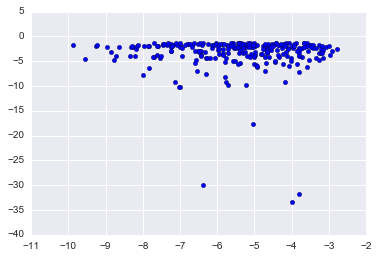

In [68]:
plt.scatter(np.log10(taxaAssociations[taxaAssociations['pFDR'] < 0.05]['Mean_decrease_in_accuracy']),np.log10(taxaAssociations[taxaAssociations['pFDR'] < 0.05]['pFDR']))

In [13]:
taxaKeep = [
('k__Archaea;p__Euryarchaeota','phylum'),
('k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae','family'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__','family'),   
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae','family'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella','genus'),
('k__Bacteria;p__Tenericutes','phylum')]
for curTax in taxaKeep:
    print(curTax[0])

k__Archaea;p__Euryarchaeota
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella
k__Bacteria;p__Tenericutes


<h4 style="text-align:center; color:brown;"> - Proportion of Significantly Varying OTUs in 10 Overlapping Taxa vs All Significant OTUs - </h4>

In [130]:
202/len(taxaAssociations[taxaAssociations['pFDR'] < 0.05])

0.5787965616045845

<h4 style="text-align:center; color:brown;"> - Look at each taxon individually and collate stats - </h4>

In [40]:
taxaAssociations['All'] = list(biom_to_pd_categorize(biom_relative(varDict['bt']), varDict['mp'], 'race')['All'])

k__Archaea;p__Euryarchaeota
 - Proportion Significant: 0.16666666666666666
   - All OTUs: 6
   - Mean All Abundance         : 2.11E-04 0.000210887293903
   - Sig OTUs: 1
   - Mean Sig Abundance         : 1.85E-04 0.000185327599165

   - Proportion  Significant OTUs: 0.16666666666666666
   - Proportion Mean Signififcant Abundance: 0.878799266353




([<matplotlib.patches.Wedge at 0x1164a7518>,
  <matplotlib.text.Text at 0x1164a05c0>])

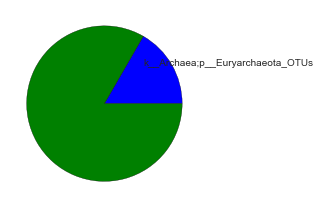

([<matplotlib.patches.Wedge at 0x11810a208>,
  <matplotlib.text.Text at 0x11811b390>])

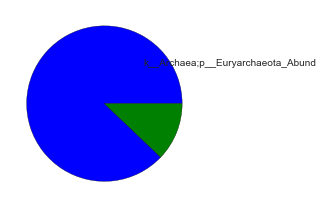

k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae
 - Proportion Significant: 0.13513513513513514
   - All OTUs: 37
   - Mean All Abundance         : 2.62E-02 0.0262153674094
   - Sig OTUs: 5
   - Mean Sig Abundance         : 2.14E-02 0.021401396434

   - Proportion  Significant OTUs: 0.13513513513513514
   - Proportion Mean Signififcant Abundance: 0.816368357529




([<matplotlib.patches.Wedge at 0x114c7af60>,
  <matplotlib.text.Text at 0x127f663c8>])

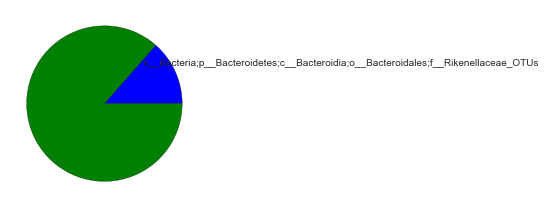

([<matplotlib.patches.Wedge at 0x119279668>,
  <matplotlib.text.Text at 0x11a53ba58>])

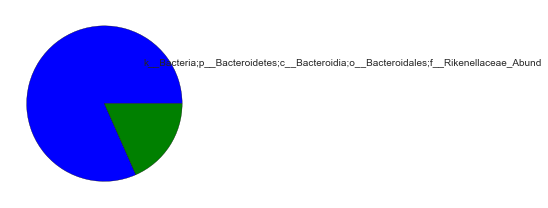

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__
 - Proportion Significant: 0.05663716814159292
   - All OTUs: 565
   - Mean All Abundance         : 4.83E-02 0.0482675533168
   - Sig OTUs: 32
   - Mean Sig Abundance         : 6.76E-03 0.00675602678354

   - Proportion  Significant OTUs: 0.05663716814159292
   - Proportion Mean Signififcant Abundance: 0.139970359367




([<matplotlib.patches.Wedge at 0x1162442b0>,
  <matplotlib.text.Text at 0x11622f630>])

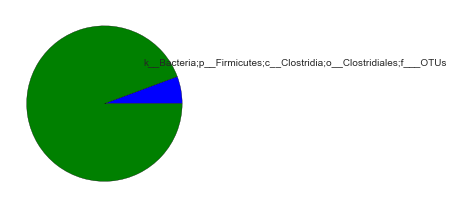

([<matplotlib.patches.Wedge at 0x18f6c3828>,
  <matplotlib.text.Text at 0x18f6d3c50>])

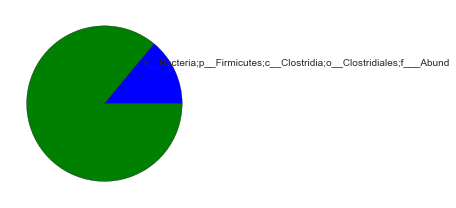

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium
 - Proportion Significant: 1.0
   - All OTUs: 1
   - Mean All Abundance         : 3.25E-06 3.25101554635e-06
   - Sig OTUs: 1
   - Mean Sig Abundance         : 3.25E-06 3.25101554635e-06

   - Proportion  Significant OTUs: 1.0
   - Proportion Mean Signififcant Abundance: 1.0




([<matplotlib.patches.Wedge at 0x116480978>,
  <matplotlib.text.Text at 0x11a86b7b8>])

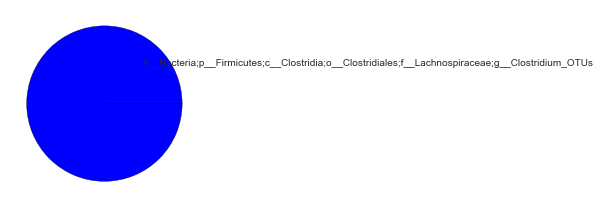

([<matplotlib.patches.Wedge at 0x11b046d68>,
  <matplotlib.text.Text at 0x11cfe07b8>])

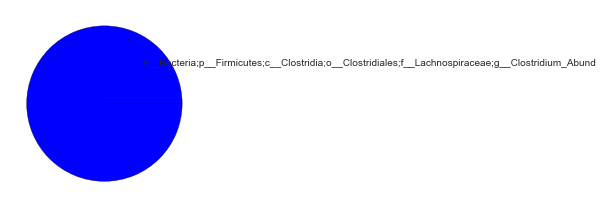

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae
 - Proportion Significant: 0.06430568499534017
   - All OTUs: 1073
   - Mean All Abundance         : 1.99E-01 0.198573789892
   - Sig OTUs: 69
   - Mean Sig Abundance         : 4.06E-02 0.0405576081717

   - Proportion  Significant OTUs: 0.06430568499534017
   - Proportion Mean Signififcant Abundance: 0.204244518845




([<matplotlib.patches.Wedge at 0x112722390>,
  <matplotlib.text.Text at 0x129b48c50>])

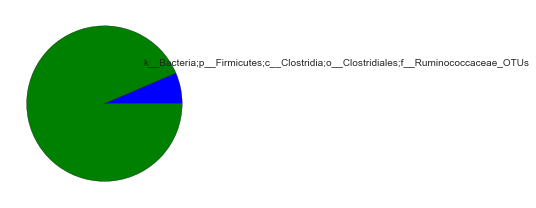

([<matplotlib.patches.Wedge at 0x11b752e10>,
  <matplotlib.text.Text at 0x118ca7cc0>])

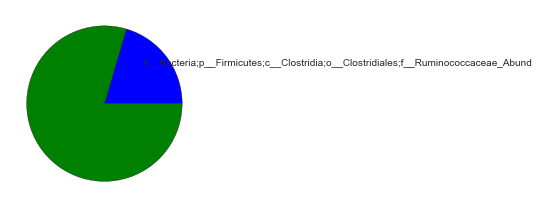

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus
 - Proportion Significant: 0.06722689075630252
   - All OTUs: 119
   - Mean All Abundance         : 2.39E-02 0.0238650425381
   - Sig OTUs: 8
   - Mean Sig Abundance         : 6.25E-03 0.00625036813304

   - Proportion  Significant OTUs: 0.06722689075630252
   - Proportion Mean Signififcant Abundance: 0.261904755588




([<matplotlib.patches.Wedge at 0x127f99f60>,
  <matplotlib.text.Text at 0x11a935400>])

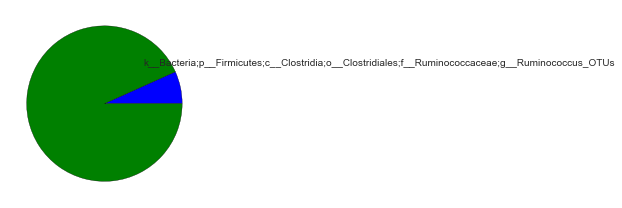

([<matplotlib.patches.Wedge at 0x1234e1d68>,
  <matplotlib.text.Text at 0x12ce214e0>])

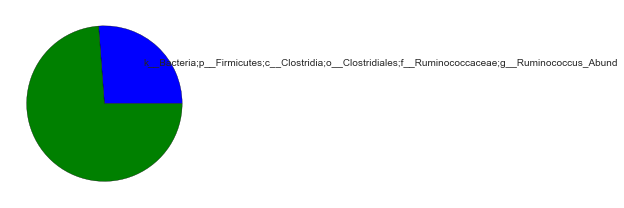

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__
 - Proportion Significant: 0.06666666666666667
   - All OTUs: 735
   - Mean All Abundance         : 8.75E-02 0.0874543228791
   - Sig OTUs: 49
   - Mean Sig Abundance         : 2.91E-02 0.0291345424466

   - Proportion  Significant OTUs: 0.06666666666666667
   - Proportion Mean Signififcant Abundance: 0.3331401066




([<matplotlib.patches.Wedge at 0x119d29780>,
  <matplotlib.text.Text at 0x11b0a6da0>])

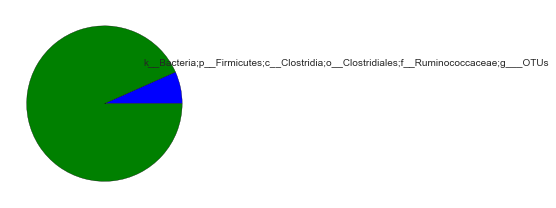

([<matplotlib.patches.Wedge at 0x117db7fd0>,
  <matplotlib.text.Text at 0x129b3e668>])

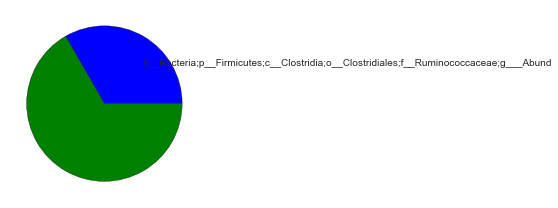

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__
 - Proportion Significant: 0.05663716814159292
   - All OTUs: 565
   - Mean All Abundance         : 4.83E-02 0.0482675533168
   - Sig OTUs: 32
   - Mean Sig Abundance         : 6.76E-03 0.00675602678354

   - Proportion  Significant OTUs: 0.05663716814159292
   - Proportion Mean Signififcant Abundance: 0.139970359367




([<matplotlib.patches.Wedge at 0x12e10acf8>,
  <matplotlib.text.Text at 0x1173fc3c8>])

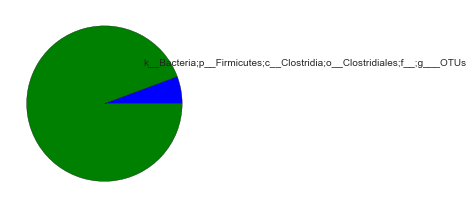

([<matplotlib.patches.Wedge at 0x1182353c8>,
  <matplotlib.text.Text at 0x11fa44b70>])

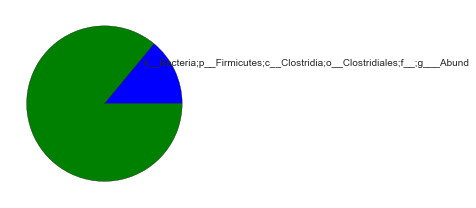

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella
 - Proportion Significant: 0.15789473684210525
   - All OTUs: 19
   - Mean All Abundance         : 1.48E-03 0.0014786484867
   - Sig OTUs: 3
   - Mean Sig Abundance         : 1.06E-03 0.00106355698598

   - Proportion  Significant OTUs: 0.15789473684210525
   - Proportion Mean Signififcant Abundance: 0.719276417314




([<matplotlib.patches.Wedge at 0x1194ddc88>,
  <matplotlib.text.Text at 0x1127367f0>])

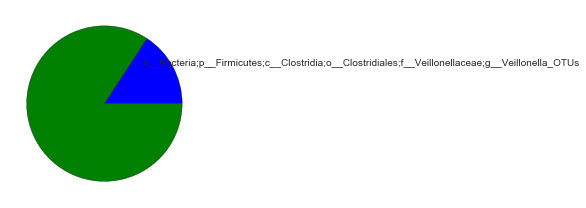

([<matplotlib.patches.Wedge at 0x1184f9eb8>,
  <matplotlib.text.Text at 0x116748588>])

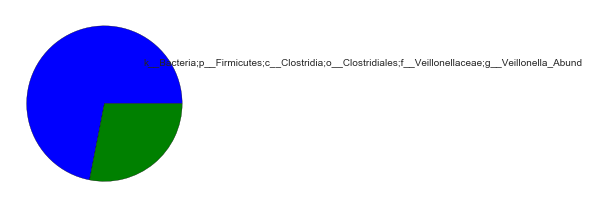

k__Bacteria;p__Tenericutes
 - Proportion Significant: 0.030303030303030304
   - All OTUs: 66
   - Mean All Abundance         : 6.29E-03 0.00628690972646
   - Sig OTUs: 2
   - Mean Sig Abundance         : 3.50E-04 0.000350334173551

   - Proportion  Significant OTUs: 0.030303030303030304
   - Proportion Mean Signififcant Abundance: 0.0557243842832




([<matplotlib.patches.Wedge at 0x119062f60>,
  <matplotlib.text.Text at 0x12e4e9358>])

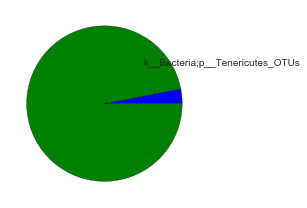

([<matplotlib.patches.Wedge at 0x1283a80b8>,
  <matplotlib.text.Text at 0x11619a4e0>])

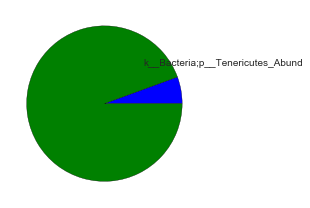

In [88]:
from decimal import Decimal

taxaKeep = [
('k__Archaea;p__Euryarchaeota','phylum'),
('k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae','family'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__','family'),   
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae','family'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella','genus'),
('k__Bacteria;p__Tenericutes','phylum')]

curSum = 0 
tabSig = []
tabAll = []
abundSig = []
abundAll = []
dfOut = pd.DataFrame(columns=['African American', 'Asian or Pacific Islander', 'Caucasian','Hispanic'])
taxaAssociations['pFDR'] = stats_fdr(pVals=taxaAssociations['pValue'])

for curTax in taxaKeep:
    print(curTax[0])
    tabOut = taxaAssociations.loc[(taxaAssociations['pFDR'] < 0.05) & (taxaAssociations[curTax[1]] == curTax[0]),
                     [curTax[1],'pFDR','Mean_decrease_in_accuracy','African American', 'Asian or Pacific Islander', 'Caucasian','Hispanic', 'All']]
    tabOutAll = taxaAssociations.loc[(taxaAssociations[curTax[1]] == curTax[0]),
                     [curTax[1],'pFDR','Mean_decrease_in_accuracy','African American', 'Asian or Pacific Islander', 'Caucasian','Hispanic', 'All']]

    tabSig.append(len(tabOut))
    tabAll.append(len(tabOutAll))
    abundSig.append(tabOut.loc[:,['African American', 'Asian or Pacific Islander', 'Caucasian','Hispanic']].sum().mean())
    abundAll.append(tabOutAll.loc[:,['African American', 'Asian or Pacific Islander', 'Caucasian','Hispanic']].sum().mean())
    print(' - Proportion Significant: '+str(tabSig[-1]/tabAll[-1]))
    dfOut.ix[curTax[0]] = tabOut.loc[:,['African American', 'Asian or Pacific Islander', 'Caucasian','Hispanic']].sum()
    
    #display(tabOut)
    print('   - All OTUs: '+str(len(tabOutAll)))
    print('   - Mean All Abundance         : '+str('%.2E' % Decimal(tabOutAll['All'].sum()))+' '+str(tabOutAll['All'].sum()))
    print('   - Sig OTUs: '+str(len(tabOut)))
    print('   - Mean Sig Abundance         : '+str('%.2E' % Decimal(tabOut['All'].sum()))+' '+str(tabOut['All'].sum()))    
    print()
    print('   - Proportion  Significant OTUs: '+str(len(tabOut)/len(tabOutAll)))
    print('   - Proportion Mean Signififcant Abundance: '+str(tabOut['All'].sum() / (tabOutAll['All'].sum()) ))
    print();print()
    curSum += len(tabOut)
    fig, axs = plt.subplots(1,1,figsize=(3,3))
    plt.pie([ len(tabOut), len(tabOutAll)-len(tabOut)]) 
    plt.text(s=(curTax[0]+'_OTUs'),x=0.5,y=0.5)
    plt.savefig(varDict['dir']+'pie_otus_'+curTax[0]+'.pdf')
    plt.tight_layout()
    plt.show()
    fig, axs = plt.subplots(1,1,figsize=(3,3))
    plt.pie([ tabOut['All'].sum()*10000000000,((tabOutAll['All'].sum()) - (tabOut['All'].sum()))*10000000000]) 
    plt.text(s=(curTax[0]+'_Abund'),x=0.5,y=0.5)
    plt.savefig(varDict['dir']+'pie_abund_'+curTax[0]+'.pdf')
    plt.tight_layout()
    plt.show()

In [71]:
t1

[0.00018532759916498707, 2.555969473777976e-05]

In [70]:
t1 = [ tabOut['All'].sum(),((tabOutAll['All'].sum()) - (tabOut['All'].sum()))]
t1[0]/t1[1]

7.2507751389946975

([<matplotlib.patches.Wedge at 0x11df6d3c8>,
  <matplotlib.text.Text at 0x119046710>])

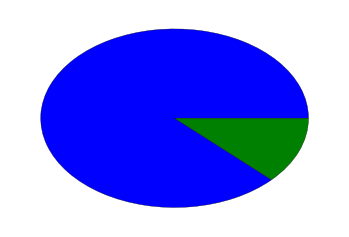

In [30]:
##################################################################################
### FUNCTION - Return Biom Counts as Pandas Dataframe Collapsed by a Mapping Category (mean=False - returns sum)
def biom_to_pd_categorize(table, mapIn, mapCol, mean=True):
    # Convert Table to Dataframe #
    tablePD = biom_to_pd(table)
    # Add Mapping File and Collapse by Mean #
    if mean == True:
        btPD = pd.concat([tablePD.T, mapIn[mapCol]], axis=1).groupby([mapCol], axis=0).mean().T
        btPD['All'] = tablePD.mean(axis=1)
    else:
        btPD = pd.concat([tablePD.T, mapIn[mapCol]], axis=1).groupby([mapCol], axis=0).sum().T
    
    # Return Collapsed Frame #
    return btPD

1081058    6.831182e-06
359105     1.616446e-06
311173     5.700453e-05
2700687    7.681508e-06
3450454    5.020930e-06
362389     1.377194e-05
1135042    3.377046e-05
176062     5.128266e-04
1001908    8.062088e-08
575041     1.804662e-05
158711     4.787891e-07
295094     2.091654e-05
2595967    4.756073e-07
4403168    2.859760e-07
4480529    1.387854e-03
183576     6.096210e-06
4442508    1.450398e-04
175087     1.969918e-06
407459     2.867014e-06
296770     6.922966e-07
4409730    3.535218e-03
4405869    7.289828e-06
92262      1.703599e-06
174353     7.222861e-06
288682     1.815479e-07
288680     5.892470e-07
192225     8.653639e-06
4353757    1.740412e-06
368711     3.401971e-06
192228     4.320119e-08
               ...     
91008      1.098239e-05
183207     1.687451e-04
1144153    3.219156e-07
147678     5.085708e-06
444649     8.360171e-07
366451     1.993133e-06
187186     9.725120e-07
187181     1.045322e-05
228556     3.820033e-06
182647     3.897670e-05
182643     3.542

<h4 style="text-align:center; color:brown;"> - Proportion of Significantly Varying OTUs in 10 Overlapping Taxa vs All  OTUs in those Taxa - </h4>

In [164]:
tabSig
tabAll

[1, 5, 32, 1, 69, 8, 49, 32, 3, 2]

[6, 37, 565, 1, 1073, 119, 735, 565, 19, 66]

<h4 style="text-align:center; color:brown;"> - Plot Relative Abundance for Each Ethnicity of Significant OTUs - </h4>

(-6, 0.0)

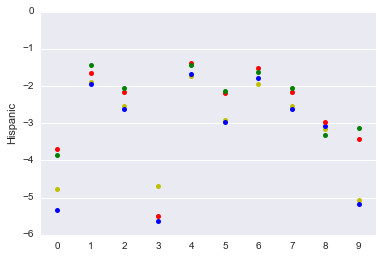

In [162]:
x = sns.stripplot(x=np.arange(len(dfOut)), y=np.log10(dfOut['African American']), color='y')

x = sns.stripplot(x=np.arange(len(dfOut)), y=np.log10(dfOut['Asian or Pacific Islander']), color='b')

x = sns.stripplot(x=np.arange(len(dfOut)), y=np.log10(dfOut['Caucasian']), color='r')

x = sns.stripplot(x=np.arange(len(dfOut)), y=np.log10(dfOut['Hispanic']), color='g')

x.set_ylim([-6,0.0])
plt.savefig(varDict['dir']+'2_4_relative_abundance_ethnicity.pdf')

<h4 style="text-align:center; color:brown;"> - Relative Abundance of Significantly Varying OTUs vs All OTUs - </h4>

[9.1254394049908728e-05,
 0.020538880665736968,
 0.0052661525293910705,
 6.461809987721565e-06,
 0.029621332870972593,
 0.0040264951250908888,
 0.020642475294149421,
 0.0052661525293910705,
 0.00077967926629916016,
 0.00028390676846916195]

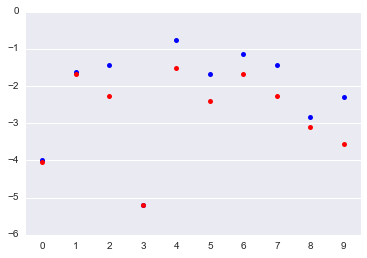

In [138]:
abundSig
x = sns.stripplot(np.arange(len(abundAll)), np.log10(abundAll), color='b')
sns.stripplot(np.arange(len(abundAll)), np.log10(abundSig), ax=x, color='r')
plt.savefig(varDict['dir']+'2_4_relative_abundance_sig_and_all_taxa.pdf')

<h4 style="text-align:center; color:brown;"> - Proportion Signfificant OTU Abundance vs Total Taxon Abundance - </h4>

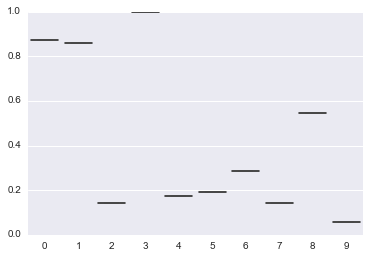

In [128]:
sns.boxplot(np.arange(len(abundSig)), [x/y for x, y in zip(abundSig, abundAll)])
plt.savefig(varDict['dir']+'2_4_relative_abundance_sig_taxa.pdf')

<h4 style="text-align:center; color:brown;"> - Proportion Signfificant OTUs vs Total OTUs in Taxon - </h4>

202

[1, 5, 32, 1, 69, 8, 49, 32, 3, 2]

[6, 37, 565, 1, 1073, 119, 735, 565, 19, 66]

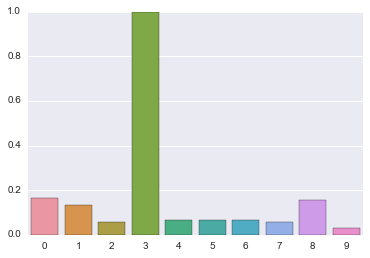

In [117]:
curSum
tabSig
tabAll
sns.barplot(np.arange(len(tabSig)),[x/y for x, y in zip(tabSig, tabAll)])
plt.savefig(varDict['dir']+'2_4_relative_proportion_sig_taxa.pdf')

<h4 style="text-align:center; color:brown;"> - Plot Distribution of RF Contribution to Accuracy - </h4>

/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


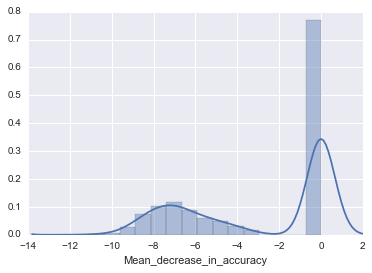

In [84]:
sns.distplot(np.log10(taxaAssociations['Mean_decrease_in_accuracy'])[]#.replace('NaN',0.0).replace('-inf',0.0))

/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


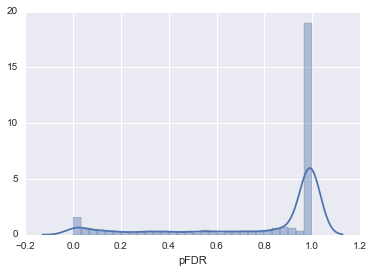

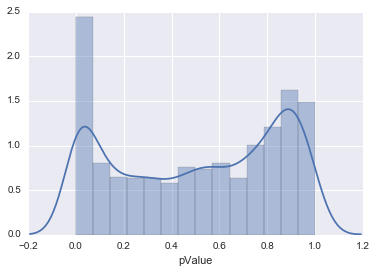

In [202]:
sns.distplot(taxaAssociations['pFDR'])
plt.show()
sns.distplot(taxaAssociations['pValue'])
plt.show()

In [215]:
taxaAssociations.sort('pBonferroni')

/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,kingdom,phylum,class,order,family,genus,species,Mean_decrease_in_accuracy,Standard_deviation,Test,...,TwoMean,pValue,TestStatistic,pFDR,pBonferroni,NumBonferroni,African American,Asian or Pacific Islander,Caucasian,Hispanic
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
514773,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Erysipelotrichi,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o...,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o...,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o...,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o...,1.050431e-04,8.832869e-05,KruskalWallis,...,NaN,6.620533e-38,175.945982,3.701540e-34,3.701540e-34,NaN,0.000000,0.000000e+00,2.288879e-06,0.000365
113919,k__Bacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Bacteroidetes;c__Bacteroidia,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,1.572239e-04,1.248796e-04,KruskalWallis,...,NaN,7.159112e-36,166.524820,2.001330e-32,4.002660e-32,NaN,0.000000,1.711049e-05,7.151395e-06,0.000784
300628,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,4.174670e-07,8.889882e-07,KruskalWallis,...,NaN,7.014986e-34,157.298849,1.307360e-30,3.922079e-30,NaN,0.000000,0.000000e+00,5.605200e-07,0.000023
70363,k__Bacteria,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,9.330030e-06,1.302801e-05,KruskalWallis,...,NaN,1.449557e-21,100.140733,2.026118e-18,8.104471e-18,NaN,0.000000,1.525184e-06,2.040721e-05,0.000101
1106290,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,9.171322e-08,2.659651e-07,KruskalWallis,...,NaN,5.139624e-14,64.950578,5.747128e-11,2.873564e-10,NaN,0.000000,3.813045e-07,1.082006e-06,0.000010
571666,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,1.024120e-07,3.148667e-07,KruskalWallis,...,NaN,6.808459e-14,64.379638,6.344349e-11,3.806609e-10,NaN,0.000000,0.000000e+00,2.091137e-06,0.000014
1107652,k__Bacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Bacteroidetes;c__Bacteroidia,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,1.951943e-06,4.209515e-06,KruskalWallis,...,NaN,1.747819e-13,62.464778,1.396008e-10,9.772054e-10,NaN,0.000000,0.000000e+00,7.691414e-06,0.000048
3827235,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,5.934688e-06,1.015972e-05,KruskalWallis,...,NaN,2.615059e-13,61.646155,1.827600e-10,1.462080e-09,NaN,0.000110,5.210526e-07,9.269229e-07,0.000002
1057169,k__Bacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Bacteroidetes;c__Bacteroidia,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacter

In [220]:
taxaAssociations.ix[825808]['species']

'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium;s__'

In [221]:
taxaAssociations.ix[4475758]['species']

'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella;s__dispar'

In [222]:
taxaAssociations.ix[730906]['species']
taxaAssociations.ix[4476604]['species']
taxaAssociations.ix[232900]['species']
taxaAssociations.ix[3138798]['species']
taxaAssociations.ix[147969]['species']
taxaAssociations.ix[4347159]['species']

'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__'

'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__[Ruminococcus];s__gnavus'

'k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__;s__'

'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Phascolarctobacterium;s__'

'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus;s__'

'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium;s__adolescentis'

In [226]:
import re
re.search('dog', 'acatanddog')

<_sre.SRE_Match object; span=(7, 10), match='dog'>

<h4 style="text-align:center; color:brown;"> - Plot Distribution of RF Contribution to Accuracy - </h4>

In [170]:
tablePD = pd.concat([biom_to_pd(biom_relative(varDict['bt'])).T, varDict['mp']['race']], axis=1)   

In [193]:
allArrays = []
for curEthnicity in ['African American', 'Asian or Pacific Islander', 'Caucasian', 'Hispanic']:
    allArrays.append(list(tablePD.loc[(tablePD['race']==curEthnicity) & (tablePD['134517']>0.0),'134517']))
    #for curVal in list(tablePD.loc[tablePD['race']==curEthnicity,'134517']):
    #    print(curVal)
    #print()

In [194]:
allArrays

[[], [], [0.0023420258523622933], [0.0012562814070351759]]

In [196]:
sp.stats.mstats.kruskalwallis(allArrays[0], allArrays[1], allArrays[2], allArrays[3])

KruskalResult(statistic=1.0, pvalue=0.31731050786291404)

In [183]:
pd_stats_mannu(dfIn=tablePD, categoricalColumn='race', continuousColumn='134517')

,Test,OneGroup,OneCount,OneMean,TwoGroup,TwoCount,TwoMean,pValue,TestStatistic,pFDR,pBonferroni,NumBonferroni
0,KruskalWallis,All,1375.0,0.000003,NaN,NaN,NaN,0.000667,17.123106,NaN,NaN,NaN
1,MannWhitneyU,Caucasian,1237.0,0.000002,Asian or Pacific Islander,88.0,0.000000,0.792019,54472.000000,0.924609,1.000000,6.0
2,MannWhitneyU,Caucasian,1237.0,0.000002,African American,13.0,0.000000,0.924609,8047.000000,0.924609,1.000000,6.0
3,MannWhitneyU,Caucasian,1237.0,0.000002,Hispanic,37.0,0.000034,0.000075,22285.000000,0.000373,0.000447,6.0
4,MannWhitneyU,Asian or Pacific Islander,88.0,0.000000,Hispanic,37.0,0.000034,0.127340,1584.000000,0.318351,0.764042,6.0
5,MannWhitneyU,African American,13.0,0.000000,Hispanic,37.0,0.000034,0.584274,234.000000,0.924609,1.000000,6.0


In [208]:
from gneiss.plot import heatmap

In [214]:
_ = heatmap(biom_to_pd(biom_relative(varDict['bt'])), varDict['tre'], mdvar=varDict['mp']['race'],  figsize=(10, 10))

AttributeError: 'NoneType' object has no attribute 'remove'

In [213]:
biom_to_pd(biom_relative(varDict['bt']))

,10317.000002503,10317.000013618,10317.000031796,10317.000026504,10317.000007104,10317.000007077,10317.000016408,10317.000005802,10317.000006952,10317.000013023,...,10317.000001654,10317.000011375,10317.000042586,10317.000041282,10317.000001208,10317.000027729,10317.000013573,10317.000010544,10317.000005878,10317.000012987
1081058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000054,0.000288,0.000082,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
359105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
311173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2700687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3450454,0.000000,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
362389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.000054,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1135042,0.000000,0.000485,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
176062,0.000000,0.001131,0.005177,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1001908,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
575041,0.000000,0.000000,0.000000,0.000055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [207]:
from bokeh.io import show, output_notebook

<h2 style="text-align:center; color:red;"> - Finalizing - </h2>

<h2 style="text-align:center; color:red;"> - Drafting - </h2>

<h4 style="text-align:center; color:brown;"> - Subtitle - </h4>

<h3 style="text-align:center; color:blue;"> - 1_6_Tree - </h3>
<h4 style="text-align:center; color:black;"> Examine Microbial Phylogeny </h4>

<h4 style="text-align:center; color:brown;"> - ETE Tree Toolkit - </h4>

In [ ]:
### ETE Tree Tools ###
import ete3 as ete

### Input Variables ###
treeIn = varDict['tre']
#dmIn = varDict['dm']
btIn = varDict['bt']
mapIn = varDict['mp']
mapCol = 'race'

##################################################################################
### FUNCTION - Import Into ETE3 Tree Object  ###
def tree_ete_in(treeIn):
    # If Tree is SKBIO Format #
    if isinstance(treeIn, TreeNode):
        eteTree  = ete.Tree.from_skbio(treeIn)
        return eteTree
    # If Passed String Try to Open File or Process String Representation #
    elif isinstance(treeIn, str):
        try:
            eteTree= ete.Tree(treeIn, format=1)
            return eteTree
        except: 
            print(' - Error: Could not Parse Tree String in ete3 - ')   
    # Else Error #
    else:
        print(' - Error: Could not Open Tree in ete3 - ')

##################################################################################
### FUNCTION - Display Tree within Jupyter Notebook ###
def tree_ete_out(eteTree, ladderize=True, circular=True, filePath=None):
    # If filepath provided then save to file (.pdf or .png) Otherwise display in notebook #
    if filePath == None: filePath = "%%inline"
    # If ladderize then ladderize the tree before displaying #
    if ladderize == True: eteTree.ladderize()
    # Render The Tree In the Notebook #
    return eteTree.render(filePath,
                          tree_style=tree_ete_style(circular=circular, 
                              showLeafNames=True, showBranchLengths=True, showBranchSupport=True,
                              scale=200, rotation=0, 
                              arcStart=0, arcSpan=350), 
                          h=200,units='mm', dpi=300)

##################################################################################
### FUNCTION - Generate TreeStyle Object for Displaying  ###
def tree_ete_style(circular=False, 
                   showLeafNames=True, showBranchLengths=True, showBranchSupport=True,
                   scale=20, rotation=0, 
                   arcStart=0, arcSpan=180):
    ### Establish TreeStyle Object ###
    ts = ete.TreeStyle()
    
    ### Circular Representation ###
    if circular == True: 
        ts.mode = "c" # draw tree in circular mode
        ts.arc_start = arcStart # 0 degrees = 3 o'clock
        ts.arc_span = arcSpan
    
    ### Rectangular Representation ###
    else: 
        ts.mode = "r" # draw tree in rectangular mode
        ts.orientation = 0 # Sets orientation starting at top or bottom #
        ts.branch_vertical_margin = 2 # Sets Pixels between Leaf Nodes #
    
    ### Data Display Options ###
    ts.min_leaf_separation = 1
    ts.show_leaf_name = showLeafNames
    ts.show_branch_length = showBranchLengths
    ts.show_branch_support = showBranchSupport
    ts.show_border = False
    ts.title = None
    
    ### Set Rotation ###
    ts.rotation = rotation
    
    ### Legend ###
    ts.legend_position = 1
    #ts.legend.add_face(ete.CircleFace(10, "red"), column=0)
    #ts.legend.add_face(ete.TextFace("0.5 support"), column=1)
    
    ### Set Scale ###
    ts.scale = scale
    return ts

##################################################################################
### FUNCTION - Generate ClusterStyle Object for Displaying  ###
# Pass in an ete Tree and convert to ClusterTree #
# Add Pandas Dataframe to ClusterTree:
#   Indices must match leaf nodes, columns should be numeric #
def tree_ete_clusterstyle(eteTree, pdDf,
                          leafHeatmap=True, leafHeatmapMin=None, leafHeatmapMax=None, leafHeatmapMean=None,
                          internalHeatmap=False, internalHeatmapMin=None, internalHeatmapMax=None, internalHeatmapMean=None,
                          leafBubbles = True, internalBubbles=True):
    
    ### Generate Cluster Tree ### 
    eteCluster = ete.ClusterTree(newick=eteTree.write())
    
    ### Add Dataframe Converted to String to ClusterTree ###
    def dfToString(pdDf):
        outStr = '#Names' # Store Outstring #
        # For each column... Add to top row of file separated by tabs
        for curCol in pdDf.columns: 
            outStr+=('\t'+curCol)  
        outStr+='\n'
        # For Each Index... Add row of counts to 
        for curIdx in list(pdDf.index):
            outStr+=curIdx+'\t'
            outStr+='\t'.join(convert_nums_to_strs(pdDf.ix[curIdx],decimals='8'))
            outStr+='\n'
        return outStr # Return String

    #Link Matrix Data to Tree #
    oS = dfToString(pdDf)
    eteCluster.link_to_arraytable(oS)
    
    ##### Scheme Options #####
    
    
    ### If Leaf Heatmap: Add Heatmap to Leaf Nodes...
    if leafHeatmap == True:
        # Check Heatmap Values and Fill if None #
        if leafHeatmapMin == None:  leafHeatmapMin  = pdDf.as_matrix().min()
        if leafHeatmapMax == None:  leafHeatmapMax  = pdDf.as_matrix().max()
        if leafHeatmapMean == None: leafHeatmapMean = pdDf.as_matrix().mean()
        
    ### Loop Through Every Node ###
    for node in eteCluster.traverse():

        ### If a Root Node...
        if node.is_root():
            continue
        ### If a Leaf Node...
        elif node.is_leaf():
            
            if leafHeatmap == True:
                node.add_face(ete.ProfileFace(max_v =leafHeatmapMax, 
                                         min_v=leafHeatmapMin, 
                                         center_v=leafHeatmapMean, 
                                         width=100, height=40, style='heatmap', colorscheme=2),
                              column=0, position="aligned")
            if leafBubbles == True:
                prevRange = (pdDf.sum().sum())
                newRange = 50
                curSum = pdDf.ix[node.name].sum().sum()
                if curSum ==0: continue # If no counts then pass
                scaleVal = ((curSum)*newRange)/prevRange
                bubbleFace = ete.CircleFace(scaleVal, 'steelblue', "circle")
                bubbleFace.opacity = 0.6
                node.add_face(bubbleFace, column=1, position="float-behind")
        else:
            if internalHeatmap == True:
                node.add_face(ete.ProfileFace(max_v =leafHeatmapMax, 
                                         min_v=leafHeatmapMin, 
                                         center_v=leafHeatmapMean, 
                                         width=100, height=50, style='bars', colorscheme=2),
                              column=1)
            if internalBubbles == True:
                prevRange = (pdDf.sum().sum())
                newRange = 50
                curSub = node.get_leaf_names()
                curSum = pdDf.ix[curSub].sum().sum()
                if curSum ==0: continue # If no counts then pass
                scaleVal = ((curSum)*newRange)/prevRange
                bubbleFace = ete.CircleFace(scaleVal, 'steelblue', "circle")
                bubbleFace.opacity = 0.6
                node.add_face(bubbleFace, column=0, position="float-behind")

    return eteCluster

<h4 style="text-align:center; color:brown;"> - Generate eteTree - </h4>

In [ ]:
##################################################################################
### Generate Ete3 Tree ###
eteTree = tree_ete_in(treeIn)

### Display ###
tree_ete_out(eteTree, ladderize=True, circular=True, filePath=None)

<h4 style="text-align:center; color:brown;"> - Generate eteClusterTree - </h4>

In [ ]:
##################################################################################
### Generate ClusterTree ###
### Convert to dataframe with grouping ###
btDf = pd.concat([biom_to_pd(btIn).T,mapIn[mapCol]], axis=1)

### Collapse abundance by group - mean ###
pdDf = btDf.groupby([mapCol], axis=0).mean().T


eteCluster = tree_ete_clusterstyle(eteTree, pdDf, internalHeatmap=False)
eteCluster.ladderize()
eteCluster.render("%%inline",
         tree_style=tree_ete_style(circular=True, 
                                   showLeafNames=True, showBranchLengths=True, showBranchSupport=True,
                                   scale=40, rotation=0, 
                                   arcStart=0, arcSpan=350), h=200,units='mm', dpi=300) 

<h3 style="text-align:center; color:blue;"> - 3_5_PiCRUST - </h3>
<h4 style="text-align:center; color:black;"> Perform PiCRUST Analysis of Predicted Metagenome </h4>

<h4 style="text-align:center; color:brown;"> - Normalize Absolute Abundance Table with PiCrust - </h4>

In [ ]:
### Perform PiCrust Normalize Analysis on BIOM Table ###
# Function will make the output directory, save the absolute abundance table, 
# normalize with terminal call, and re-load normalized table
def biom_picrust_normalize(table, mapIn, out_dir):
    print(' - Normalizing BIOM Table with External PiCRUST Script -')
    dir_make(out_dir) # Make Output Folder
    biom_json(path=out_dir+'0_input_biom.biom', table=varDict['bt']) # Save Input BIOM Table
    ### Normalize with PICRUST Script ###
    os.system(command='normalize_by_copy_number.py -i '+out_dir+'0_input_biom.biom -o '+out_dir+'1_normalized.biom')
    ### Load Table with Normalized Counts ###
    print(' - Loading Normalized Table: '+str(out_dir+'1_normalized.biom'))
    tableNorm = biom_in(out_dir+'1_normalized.biom')
    return tableNorm

### Perform PiCrust Predict Metagenome Analysis on BIOM Table ###
# Should Pass the picrsut analysis directory with normalized table using PiCrust [biom_picrust_normalize()] #
def biom_picrust_predict(out_dir):
    print(' - Predicting Metagenomes with External PiCrust Script - ')
    ### Predict with PICRUST Script ###
    os.system(command='predict_metagenomes.py -i '+out_dir+'1_normalized.biom -f -o '+out_dir+'2_metagenome_predictions.txt')
    ### Load Table with Predict Metagenomes ###
    print(' - Loading Metagenome Table: '+str(out_dir+'2_metagenome_predictions.txt'))
    tableMeta = biom_in(out_dir+'2_metagenome_predictions.txt')
    return tableMeta

In [ ]:
### Normalize the BIOM Table ###
tableNorm = biom_picrust_normalize(table=varDict['bt'], mapIn=varDict['mp'], out_dir=varDict['dir']+'3_5_picrust/')
biom_summarize(tableNorm)

### Predict Metagenomes for the Normalized BIOM Table ###
tableMeta = biom_picrust_predict(out_dir=varDict['dir']+'3_5_picrust/')
biom_summarize(tableMeta)

In [ ]:
### Perform PiCrust Collapse Pathways on Metagenome Table ###
# Should pass a picrust directory where metagenome predictions exist #
def biom_picrust_collapse():
    ### Collapse Metagenomes into Pathways with PICRUST Script ###
    os.system(command='predict_metagenomes.py -i '+out_dir+'1_normalized.biom -f -o '+out_dir+'2_metagenome_predictions.txt')
    

<h3 style="text-align:center; color:blue;"> - 4_0_Beta_Intra_Inter - </h3>
<h4 style="text-align:center; color:black;"> Examine if Intra-Group Beta Diversity Distances are Less than Inter-Group </h4>

In [ ]:
##################################################################################
### FUNCTION: BETA DIVERSITY - INTRA/INTER DISTANCE COMPARISONS ###
def beta_intra_inter(dmIn, mapIn, mapCategory, subsample=100000):
    ##### Convert DISTANCE MATRIX to DATAFRAME #####
    dmIn = dmIn.to_data_frame()
    ### Get unique values in mapping category ###
    mapCats = list(mapIn[mapCategory].unique())
    ##### SORTING / ORGANIZING DATA - Add category to distance matrix ###
    dmCat = pd.concat([dmIn, mapIn[mapCategory]],axis=1,join='inner')
    ##### STORAGE STRUCTURES #####
    allDists = {}; meanDists = {}; groupIndices = {}

    ### SUBSAMPLING - For each group... store indices ###
    for curGroup in mapCats:
        ### If more samples than subsample depth... Subsample and store ###
        if len(dmCat[dmCat[mapCategory] == curGroup].index) > subsample: groupIndices[curGroup] = list(dmCat[dmCat[mapCategory] == curGroup].sample(n=subsample, axis=0, replace=False).index)
        ### Else just use all samples from that group ###
        else: groupIndices[curGroup] = list(dmCat[dmCat[mapCategory] == curGroup].index)

    ##### CALCULATING GROUP DISTANCES #####
    ### For every combination of groups ###
    for curCompare in itertools.product(mapCats,repeat=2):
        ##### FORMAT DM #####
        ### Get Distances ###
        curDM = dmCat.loc[groupIndices[curCompare[0]],groupIndices[curCompare[1]]]
        ### If intra group distance we only want to take values from the top half of matrix ###
        if curCompare[0] == curCompare[1]:
            ### Set all values below diagonal to 0.0 ###
            curDM = pd.DataFrame(np.triu(curDM, k=0), index=curDM.index, columns=curDM.columns)
            ### Set all 0.0 values to np.nan (if two samples are identical (i.e. 0.0 dist) will be excluded!!! You probably did something wrong anyway if that is the case :)
            curDM[curDM==0.0]=np.nan
        ### Flatten all distances into a list ###
        allCurDists = curDM.values.flatten()
        ### Remove nan (for intra) ###
        allCurDists = allCurDists[~np.isnan(allCurDists)]
        ##### AVERAGE SAMPLE DISTANCES BETWEEN GROUPS #####
        if curCompare[0] not in meanDists.keys(): meanDists[curCompare[0]] = {}
        meanDists[curCompare[0]][curCompare[1]] = curDM.mean(axis=1, skipna=True)
        ##### ALL SAMPLE DISTANCES BETWEEN GROUPS #####
        if curCompare[0] not in allDists.keys(): allDists[curCompare[0]] = {}
        allDists[curCompare[0]][curCompare[1]] = allCurDists
    
    ##### COMPARE GROUP DISTANCES #####
    ### Dataframe for Results ###
    dfOut = pd.DataFrame(columns=['dists','type','subsample','depth', 'metric','g0','g0mean','g0count','g1','g1mean','g1count','pval','tstat']); curIDX = 0
    ### For each combination of groups... ###
    for curCompare in itertools.combinations(mapCats,2):
        ### Calculate INTRA-INTRA Mann-Whitney-U on ALL Distances ###
        outMann = sp.stats.mannwhitneyu(allDists[curCompare[0]][curCompare[0]], allDists[curCompare[1]][curCompare[1]], use_continuity=True, alternative='two-sided')
        dfOut.loc[curIDX] = ['all','intra-intra',subsample,np.nan,np.nan,curCompare[0],np.mean(allDists[curCompare[0]][curCompare[0]]), len(allDists[curCompare[0]][curCompare[0]]),curCompare[1],np.mean(allDists[curCompare[1]][curCompare[1]]), len(allDists[curCompare[1]][curCompare[1]]),outMann[1], outMann[0]]; curIDX+=1
        ### Calculate INTRA-INTER Mann-Whitney-U on ALL Distances ###
        outMann = sp.stats.mannwhitneyu(allDists[curCompare[0]][curCompare[0]],allDists[curCompare[0]][curCompare[1]], use_continuity=True, alternative='two-sided')
        dfOut.loc[curIDX] = ['all','intra-inter',subsample,np.nan,np.nan,curCompare[0],np.mean(allDists[curCompare[0]][curCompare[0]]),len(allDists[curCompare[0]][curCompare[0]]),(curCompare[0]+'-'+curCompare[1]),np.mean(allDists[curCompare[0]][curCompare[1]]),len(allDists[curCompare[0]][curCompare[1]]),outMann[1], outMann[0]]; curIDX+=1
        ### Calculate INTRA-INTER Mann-Whitney-U on ALL Distances ###
        outMann = sp.stats.mannwhitneyu(allDists[curCompare[1]][curCompare[1]],allDists[curCompare[0]][curCompare[1]], use_continuity=True, alternative='two-sided')
        dfOut.loc[curIDX] = ['all','intra-inter',subsample,np.nan,np.nan,curCompare[1],np.mean(allDists[curCompare[1]][curCompare[1]]),len(allDists[curCompare[1]][curCompare[1]]),(curCompare[1]+'-'+curCompare[0]),np.mean(allDists[curCompare[0]][curCompare[1]]),len(allDists[curCompare[0]][curCompare[1]]),outMann[1], outMann[0]]; curIDX+=1
        ### Calculate INTRA-INTRA Mann-Whitney-U on MEAN Distances ### 
        outMann = sp.stats.mannwhitneyu(meanDists[curCompare[0]][curCompare[0]],meanDists[curCompare[1]][curCompare[1]],use_continuity=True, alternative='two-sided')
        dfOut.loc[curIDX] = ['mean','intra-intra',subsample,np.nan,np.nan,curCompare[0],np.mean(meanDists[curCompare[0]][curCompare[0]]), len(meanDists[curCompare[0]][curCompare[0]]),curCompare[1],np.mean(meanDists[curCompare[1]][curCompare[1]]), len(meanDists[curCompare[1]][curCompare[1]]),outMann[1], outMann[0]]; curIDX+=1
        ### Calculate INTRA-INTER Mann-Whitney-U on MEAN Distances ### 
        outMann = sp.stats.mannwhitneyu(meanDists[curCompare[0]][curCompare[0]],meanDists[curCompare[0]][curCompare[1]],use_continuity=True, alternative='two-sided')
        dfOut.loc[curIDX] = ['mean','intra-inter',subsample,np.nan,np.nan,curCompare[0],np.mean(meanDists[curCompare[0]][curCompare[0]]), len(meanDists[curCompare[0]][curCompare[0]]),curCompare[0]+'-'+curCompare[1],np.mean(meanDists[curCompare[0]][curCompare[1]]), len(meanDists[curCompare[0]][curCompare[1]]),outMann[1], outMann[0]]; curIDX+=1
        ### Calculate INTRA-INTER Mann-Whitney-U on MEAN Distances ### 
        outMann = sp.stats.mannwhitneyu(meanDists[curCompare[1]][curCompare[1]],meanDists[curCompare[1]][curCompare[0]],use_continuity=True, alternative='two-sided')
        dfOut.loc[curIDX] = ['mean','intra-inter',subsample,np.nan,np.nan,curCompare[1],np.mean(meanDists[curCompare[1]][curCompare[1]]), len(meanDists[curCompare[1]][curCompare[1]]),curCompare[1]+'-'+curCompare[0],np.mean(meanDists[curCompare[1]][curCompare[0]]), len(meanDists[curCompare[1]][curCompare[0]]),outMann[1], outMann[0]]; curIDX+=1
    
    ### Collate all Distances and Calculate Significance Across all Samples ### 
    allIntra = []; allInter = []; meanIntra = []; meanInter = []
    for curCompare in itertools.product(mapCats,repeat=2):
        if curCompare[0] == curCompare[1]: allIntra.extend(list(allDists[curCompare[0]][curCompare[1]])); meanIntra.extend(list(meanDists[curCompare[0]][curCompare[1]]))
        else: allInter.extend(list(allDists[curCompare[0]][curCompare[1]])); meanInter.extend(list(meanDists[curCompare[0]][curCompare[1]]))
    ### Calculate Mann-Whitney-U on All Intra and Inter Distances ### 
    outMann = sp.stats.mannwhitneyu(meanIntra,meanInter,use_continuity=True, alternative='two-sided')
    dfOut.loc[curIDX] = ['mean','all-intra-inter',subsample,np.nan,np.nan,'all_intra',np.nanmean(meanIntra), len(meanIntra),'all_inter',np.nanmean(meanInter), len(meanInter),outMann[1], outMann[0]]; curIDX+=1
    ### Calculate Mann-Whitney-U on All Intra and Inter Distances ### 
    outMann = sp.stats.mannwhitneyu(allIntra,allInter,use_continuity=True, alternative='two-sided')
    dfOut.loc[curIDX] = ['all','all-intra-inter',subsample,np.nan,np.nan,'all_intra',np.nanmean(allIntra), len(allIntra),'all_inter',np.nanmean(allInter), len(allInter),outMann[1], outMann[0]]
    return dfOut

<h3 style="text-align:center; color:blue;"> - 2_6_Taxa_Subset - </h3>
<h4 style="text-align:center; color:black;"> Filter Table to Contain Only a List of Taxa, Output Results, and Compute Beta Diversity </h4>

<h4 style="text-align:center; color:brown;"> - All FDR Ethnically Significant Families - </h4>

In [ ]:
# List of Taxa to Keep #
outDir  = varDict['dir']+'2_6_taxa_subset_ethnic_families_fdr'
taxaLevel = 5 # Number ';' + 1 (i.e. 2:Phylum, 3:Class, 4:Order, 5:Family, 6:Genus)
taxaKeep = ['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Christensenellaceae',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__',
'k__Bacteria;p__Actinobacteria;c__Nitriliruptoria;o__Euzebyales;f__Euzebyaceae',
'k__Bacteria;p__Cyanobacteria;c__4C0d-2;o__YS2;f__',
'k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae',
'k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__',
'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae',
'k__Bacteria;p__Bacteroidetes;c__[Rhodothermi];o__[Rhodothermales];f__[Balneolaceae]',
'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Crenotrichaceae',
'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylococcaceae',
'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae',
'k__Bacteria;p__Spirochaetes;c__Spirochaetes;o__Spirochaetales;f__Spirochaetaceae',
'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Microbacteriaceae',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae',
'k__Bacteria;p__Synergistetes;c__Synergistia;o__Synergistales;f__Dethiosulfovibrionaceae',
'k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptococcaceae',
'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Odoribacteraceae]',
'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__[Chromatiaceae]',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Dehalobacteriaceae',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__SHA-98;f__',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Mogibacteriaceae]',
'k__Bacteria;p__Tenericutes;c__RF3;o__ML615J-28;f__',
'k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae',
'k__Bacteria;p__Lentisphaerae;c__[Lentisphaeria];o__Victivallales;f__Victivallaceae',
'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Leptotrichiaceae',
'k__Archaea;p__Euryarchaeota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanoregulaceae',
'k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__DHVEG-1',
'k__Bacteria;p__Actinobacteria;c__MB-A2-108;o__;f__',
'k__Bacteria;p__Armatimonadetes;c__Armatimonadia;o__Armatimonadales;f__Armatimonadaceae',
'k__Bacteria;p__Chloroflexi;c__Anaerolineae;o__A31;f__',
'k__Bacteria;p__Elusimicrobia;c__;o__;f__',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Gracilibacteraceae',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__SBYG_4172',
'k__Bacteria;p__Nitrospirae;c__Nitrospira;o__Nitrospirales;f__',
'k__Bacteria;p__OP1;c__MSBL6;o__;f__',
'k__Bacteria;p__OP3;c__BD4-9;o__;f__',
'k__Bacteria;p__OP3;c__koll11;o__GIF10;f__',
'k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__BPC076;f__',
'k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfobacterales;f__Desulfobacteraceae',
'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Idiomarinaceae',
'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__Saccharospirillaceae',
'k__Bacteria;p__Tenericutes;c__Mollicutes;o__Entomoplasmatales;f__',
'k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae',
'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae',
'k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Burkholderiales;f__Oxalobacteraceae']

<h4 style="text-align:center; color:brown;"> - All Bonferroni Ethnically Significant Families - </h4>

In [ ]:
### Input Variables ###
inTable = varDict['bt']
inTree  = varDict['tre']
inMap   = varDict['mp']
inTables= varDict['rts']
rarefaction_depth = 1000

# List of Taxa to Keep #
outDir  = varDict['dir']+'2_6_taxa_subset_ethnic_families_bonferroni'
taxaLevel = 5 # Number ';' + 1 (i.e. 2:Phylum, 3:Class, 4:Order, 5:Family, 6:Genus)
taxaKeep = ['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Christensenellaceae',
'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__',
'k__Bacteria;p__Actinobacteria;c__Nitriliruptoria;o__Euzebyales;f__Euzebyaceae',
'k__Bacteria;p__Cyanobacteria;c__4C0d-2;o__YS2;f__',
'k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae',
'k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__',
'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae',
'k__Bacteria;p__Bacteroidetes;c__[Rhodothermi];o__[Rhodothermales];f__[Balneolaceae]',
'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Crenotrichaceae',
'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylococcaceae',
'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae',
'k__Bacteria;p__Spirochaetes;c__Spirochaetes;o__Spirochaetales;f__Spirochaetaceae',
'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Microbacteriaceae']

<h4 style="text-align:center; color:brown;"> - All Overlapping HMP and AG Taxa - </h4>

In [ ]:
taxaKeep = [
('k__Archaea;p__Euryarchaeota',2),
('k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae',5),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__',5),   
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae',5),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella',6),
('k__Bacteria;p__Tenericutes',2)]

<h4 style="text-align:center; color:red;"> - Subset Pipeline for All Taxa in List Together - </h4>

In [ ]:
### Extracts a Subset of Taxa and Performs BIOM Analysis ###
# taxaKeep can be Either:
#    A list of strings where each represents a taxon name (must be all same taxonomic level and pass taxLevel)
#    A list of tuples where each position contains (strName, intTaxLevel)
#    A String Name for Individual Taxon
# taxaLevel (must be passed if passing list of strings or individual string)
# individually=True will also perform the analysis on each taxon one by one, =false will do all taxa together
def biom_taxa_subset_all(taxaKeep, btIn, mapIn, treIn, outPath='2_6_taxa_subset', taxaLevel=None, 
                           rarefy=1000, rareTables=None, beta=['unweighted_unifrac','weighted_unifrac']):
    print(' - Performing Taxa Subset Analysis - ')
    
    ### Check if Passed List of Strings or List of Tuples or Individual String ###
    if isinstance(taxaKeep, str): taxaUse = [(taxaKeep, taxaLevel)]
    elif isinstance(taxaKeep, list): # If Passed a List #
        if isinstance(taxaKeep[0], tuple): # If passed a list of Tuples #
            taxaUse = taxaKeep
        elif isinstance(taxaKeep[0], str): # If passed a list of Strings #
            taxaUse = []
            for curTaxIn in taxaKeep:
                taxaUse.append((curTaxIn, taxaLevel))
    
    ### Store All OTUs ###
    allOTUs = []
    
    ### Loop through each Taxon ###
    for taxN, taxL in zip([[*x] for x in zip(*taxaUse)][0], [[*x] for x in zip(*taxaUse)][1]): # For each taxon...
        print(' - Filtering to '+str(taxN)+' at level '+str(taxL)+' - ')
        
        ### Get Filtered BIOM Table
        taxabt = biom_filtertaxa_keep(table=copy.deepcopy(btIn), taxaKeep=[taxN], taxLevel=taxL)
        
        ### Store all OTUs ###
        if len(biom_obs(taxabt)) < 1:
            print(' - Error: No Observations Left in the Table - ')
            continue
        else:
            allOTUs.extend(biom_obs(taxabt))
     
    ### Get OTUs as SET ###
    allOTUs = set(allOTUs)
    
    ### Filter BIOM Table ###
    allBT = biom_filterobs_keep(table=copy.deepcopy(btIn), listKeep=allOTUs) 
    
    ### Save Processed Table ###
    varDictFilter = pipe_biom_process(bt=allBT, 
                                      gen_relative=False,
                                      tre=treIn, 
                                      mp=mapIn,
                                      filter_sam_min=1, filter_obs_min=1,
                                      dir_path=outPath)

    ### Filter and Save Rarefied Tables ###
    if (isinstance(rarefy, int)) and (rareTables!=None):
        print('   - Rarefying Table - ')
        
        varDictFilter['rts'] = []
        print('\n   - Filtering and Writing Rarefied Tables - ')
        dir_make(dirPath=outPath+'/1_2_rarefaction_'+str(rarefy)+'/')
        ### For Each Filtered Rarefied Table ###
        for curIdx, curTab in enumerate(biom_yield_filtered_rarefactions(varDictFilter['bt'], rareTables)):
            ### Store Rarefied Table ###
            varDictFilter['rts'].append(biom_filtersam_mincount(curTab, 1))
            ### Save Filtered Rarefied Tables ###
            biom_json(varDictFilter['rts'][-1], outPath+'/1_2_rarefaction_'+str(rarefy)+'/rarefaction_'+str(curIdx)+'.biom')

        ### Compute and Save Beta Diversity ###
        if beta != None:
            print('   - Calculating Beta Diversity - ')
            varDictFilter = pipe_biom_diversity(varDict=varDictFilter,
                                                rarefaction=rarefy, dir_path=outPath, 
                                                alpha=[], 
                                                beta=beta, 
                                                consensus=False, upgma=False)
    ### Return Filtered Project ###
    return varDictFilter

In [ ]:
biom_taxa_subset_all(taxaKeep, varDict['bt'], varDict['mp'], varDict['tre'], 
                     outPath=dir_path+'2_6_taxa_subset', 
                     rarefy=1000, rareTables=varDict['rts'],
                     beta=None)

<h4 style="text-align:center; color:red;"> - Subset Pipeline for Each Taxon Individually - </h4>

In [ ]:
taxaKeep = [('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae',5),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella',6),
('k__Bacteria;p__Tenericutes',2)]

### Extracts a Subset of Taxa and Performs BIOM Analysis ###
# taxaKeep can be Either:
#    A list of strings where each represents a taxon name (must be all same taxonomic level and pass taxLevel)
#    A list of tuples where each position contains (strName, intTaxLevel)
#    A String Name for Individual Taxon
# taxaLevel (must be passed if passing list of strings or individual string)
# individually=True will also perform the analysis on each taxon one by one, =false will do all taxa together
def biom_taxa_subset_yield_individual(taxaKeep, btIn, mapIn, treIn, outPath='2_6_taxa_subset', taxaLevel=None, 
                           rarefy=1000, rareTables=None, beta=['unweighted_unifrac','weighted_unifrac']):
    print(' - Performing Taxa Subset Analysis - ')
    
    ### Check if Passed List of Strings or List of Tuples or Individual String ###
    if isinstance(taxaKeep, str): taxaUse = [(taxaKeep, taxaLevel)]
    elif isinstance(taxaKeep, list): # If Passed a List #
        if isinstance(taxaKeep[0], tuple): # If passed a list of Tuples #
            taxaUse = taxaKeep
        elif isinstance(taxaKeep[0], str): # If passed a list of Strings #
            taxaUse = []
            for curTaxIn in taxaKeep:
                taxaUse.append((curTaxIn, taxaLevel))
    
    ### Loop through each Taxon ###
    for taxN, taxL in zip([[*x] for x in zip(*taxaUse)][0], [[*x] for x in zip(*taxaUse)][1]): # For each taxon...
        print(' - Filtering to '+str(taxN)+' at level '+str(taxL)+' - ')
        
        ### Get Filtered BIOM Table
        taxabt = biom_filtertaxa_keep(table=copy.deepcopy(btIn), taxaKeep=[taxN], taxLevel=taxL)
        
        ### Store all OTUs ###
        if len(biom_obs(taxabt)) < 2:
            print(' - Error: Less than Two Observations Left in the Table - ')
            continue
        
        ### If evaluating each Taxon individually ###
        print('   - Evaluating Individually - ')
        ### Save Processed Table ###
        varDictFilter = pipe_biom_process(bt=taxabt, 
                                          gen_relative=False,
                                          tre=treIn, 
                                          mp=mapIn,
                                          filter_sam_min=1, filter_obs_min=1,
                                          dir_path=outPath+'_'+str(taxN))

        ### Filter and Save Rarefied Tables ###
        if (isinstance(rarefy, int)) and (rareTables!=None):
            print('   - Rarefying Table - ')
            try:
                varDictFilter['rts'] = []
                print('\n   - Filtering and Writing Rarefied Tables - ')
                dir_make(dirPath=outPath+'_'+str(taxN)+'/1_2_rarefaction_'+str(rarefy)+'/')
                ### For Each Filtered Rarefied Table ###
                for curIdx, curTab in enumerate(biom_yield_filtered_rarefactions(varDictFilter['bt'], rareTables)):
                    ### Store Rarefied Table ###
                    varDictFilter['rts'].append(biom_filtersam_mincount(curTab, 1))
                    ### Save Filtered Rarefied Tables ###
                    biom_json(varDictFilter['rts'][-1], outPath+'_'+str(taxN)+'/1_2_rarefaction_'+str(rarefy)+'/rarefaction_'+str(curIdx)+'.biom')
            except: print('   - Error: Could not Rarefy: '+taxN+' - ')

            ### Compute and Save Beta Diversity ###
            if beta != None:
                try:
                    print('   - Calculating Beta Diversity - ')
                    varDictFilter = pipe_biom_diversity(varDict=varDictFilter,
                                                            rarefaction=rarefy, dir_path=outPath+'_'+str(taxN), 
                                                            alpha=[], 
                                                            beta=beta, 
                                                            consensus=False, upgma=False)
                except: print('   - Error: Could not Perform Beta Diversity: '+curtax+' - ')
        ### Yield Filtered Project ###
        yield varDictFilter

<h4 style="text-align:center; color:red;"> - Loop through each taxon in list, perform biom analysis including rarefaction and beta diversity, and perform some basic analyses - </h4>

In [ ]:
from IPython.display import clear_output

for varIdx, varCur in enumerate(biom_taxa_subset_yield_individual(taxaKeep, varDict['bt'], varDict['mp'], varDict['tre'], 
                                     outPath=dir_path+'2_6_taxa_subset', 
                                     rarefy=1000, rareTables=varDict['rts'],
                                     beta=['unweighted_unifrac','weighted_unifrac'])):
    break
    try:
        ### Perform ANOSIM Analysis Unweighted Unifrac ###
        vdf = biom_beta_anosim(betaTables=varCur['dms']['unweighted_unifrac'], category='race', mapDF=varCur['mp'], permutations=99)
        display(vdf)
        vdf.to_csv(path=varCur['dir']+'/4_1_anosim_unweighted_unifrac.txt', sep='\t')

        ### Perform ANOSIM Analysis Weighted Unifrac ###
        vdf = biom_beta_anosim(betaTables=varCur['dms']['weighted_unifrac'], category='race', mapDF=varCur['mp'], permutations=99)
        display(vdf)
        vdf.to_csv(path=varCur['dir']+'/4_1_anosim_weighted_unifrac.txt', sep='\t')

        ### Generate Phylogeny Tree ###
        eteTree = tree_ete_in(varCur['tre'])
        xOut = tree_ete_out(eteTree=eteTree, filePath=varCur['dir']+'/1_6_tree.pdf', circular=True, ladderize=True)

        ### Generate ClusterTree ###
        ### Convert to dataframe with grouping ###
        btDf = pd.concat([biom_to_pd(varCur['bt']).T,varCur['mp']['race']], axis=1)

        ### Collapse abundance by group - mean ###
        pdDf = btDf.groupby([mapCol], axis=0).mean().T


        eteCluster = tree_ete_clusterstyle(eteTree, pdDf, internalHeatmap=False)
        eteCluster.ladderize()
        xOut = eteCluster.render(varCur['dir']+'/1_6_tree_cluster.pdf',
                 tree_style=tree_ete_style(circular=False, 
                                           showLeafNames=True, showBranchLengths=True, showBranchSupport=True,
                                           scale=40, rotation=0, 
                                           arcStart=0, arcSpan=350), h=200,units='mm', dpi=300) 
        xOut = eteCluster.render(varCur['dir']+'/1_6_tree_cluster_circular.pdf',
                 tree_style=tree_ete_style(circular=True, 
                                           showLeafNames=True, showBranchLengths=True, showBranchSupport=True,
                                           scale=40, rotation=0, 
                                           arcStart=0, arcSpan=350), h=200,units='mm', dpi=300) 
    except: print(' - Could not ANOSIM and Tree for '+varCur['dir']+' - ')

<h4 style="text-align:center; color:red;"> - Re-Input Subsets and Analyze - </h4>

In [ ]:
mainDir = dir_path
from IPython.display import clear_output

### Loop Through Each Taxa Subset ###
for curIdx, curSubset in enumerate(glob.glob(mainDir+'2_6*/')):
    print('\n'+curSubset)
    if ui_tf():
        break
    else:
        clear_output()
        continue

varCur = pipe_input(biom_path=curSubset+'1_0_biom.biom', 
           map_path=curSubset+'1_0_map.txt', 
           tre_path=curSubset+'1_0_tree.tre', 
           rare_dir=curSubset+'1_2_rarefaction_1000/*',
           dist_matrices=curSubset+'1_4_beta/unweighted_unifrac_1000/dm_*.txt')
varCur['dir'] = curSubset

In [ ]:
varCur['tre'] = TreeNode.read(varCur['dir']+'1_0_tree.tre')

In [ ]:
### Convert to dataframe with grouping ###
btDf = pd.concat([biom_to_pd(biom_relative(varDict['bt'])).T, varDict['mp'][mapCol]], axis=1)

### Collapse abundance by group - mean ###
pdDf = btDf.groupby([mapCol], axis=0).mean().T

In [ ]:
mapCol= 'race'

##################################################################################
### Generate Ete3 Tree for subset dataset ###
eteTree = tree_ete_in(varCur['tre'])

### Display eteTree ###
#tree_ete_out(eteTree, ladderize=True, circular=True, filePath=None)

##################################################################################
### Generate Relative Abundance Dataframe of full table (all observations) ###
### Convert to dataframe with grouping ###
btDf = pd.concat([biom_to_pd(biom_relative(varDict['bt'])).T, varDict['mp'][mapCol]], axis=1)
### Collapse abundance by group - mean each column should have ###
pdDf = btDf.groupby([mapCol], axis=0).mean().T

##################################################################################
### Generate ClusterTree ###

In [ ]:
##################################################################################
### FUNCTION - Generate TreeStyle Object for Displaying  ###
def tree_ete_style(circular=False, 
                   showLeafNames=True, showBranchLengths=True, showBranchSupport=True,
                   scale=20, rotation=0, 
                   arcStart=0, arcSpan=180):
    ### Establish TreeStyle Object ###
    ts = ete.TreeStyle()
    
    ### Circular Representation ###
    if circular == True: 
        ts.mode = "c" # draw tree in circular mode
        ts.arc_start = arcStart # 0 degrees = 3 o'clock
        ts.arc_span = arcSpan
    
    ### Rectangular Representation ###
    else: 
        ts.mode = "r" # draw tree in rectangular mode
        ts.orientation = 0 # Sets orientation starting at top or bottom #
        ts.branch_vertical_margin = 2 # Sets Pixels between Leaf Nodes #
        
    ### Data Display Options ###
    ts.min_leaf_separation = 1
    ts.show_leaf_name = showLeafNames
    ts.show_branch_length = showBranchLengths
    ts.show_branch_support = showBranchSupport
    ts.show_border = False
    ts.title = None
    
    ### Set Rotation ###
    ts.rotation = rotation
    
    ### Legend ###
    ts.legend_position = 1
    #ts.legend.add_face(ete.CircleFace(10, "red"), column=0)
    #ts.legend.add_face(ete.TextFace("0.5 support"), column=1)
    
    ### Set Scale ###
    ts.scale = scale
    return ts

##################################################################################
### FUNCTION - Generate ClusterStyle Object for Displaying  ###
# Pass in an ete Tree and convert to ClusterTree #
# Add Pandas Dataframe to ClusterTree:
#   Indices must match leaf nodes, columns should be numeric #
def tree_ete_clusterstyle(eteTree, pdDf,
                          leafHeatmap=True, leafHeatmapMin=None, leafHeatmapMax=None, leafHeatmapMean=None,
                          internalHeatmap=False, internalHeatmapMin=None, internalHeatmapMax=None, internalHeatmapMean=None,
                          leafBubbles = True, internalBubbles=True):
    
    ### Generate Cluster Tree ### 
    eteCluster = ete.ClusterTree(newick=eteTree.write())
    
    pdDf = pdDf.ix[eteTree.get_leaf_names()]
    
    ### Add Dataframe Converted to String to ClusterTree ###
    def dfToString(pdDf):
        outStr = '#Names' # Store Outstring #
        # For each column... Add to top row of file separated by tabs
        for curCol in pdDf.columns: 
            outStr+=('\t'+curCol)  
        outStr+='\n'
        # For Each Index... Add row of counts to 
        for curIdx in list(pdDf.index):
            outStr+=curIdx+'\t'
            outStr+='\t'.join(convert_nums_to_strs(pdDf.ix[curIdx],decimals='8'))
            outStr+='\n'
        return outStr # Return String

    #Link Matrix Data to Tree #
    oS = dfToString(pdDf)
    eteCluster.link_to_arraytable(oS)
    
    ### If Leaf Heatmap: Add Heatmap to Leaf Nodes...
    if leafHeatmap == True:
        # Check Heatmap Values and Fill if None #
        if leafHeatmapMin == None:  leafHeatmapMin  = pdDf.as_matrix().min()
        if leafHeatmapMax == None:  leafHeatmapMax  = pdDf.as_matrix().max()
        if leafHeatmapMean == None: leafHeatmapMean = pdDf.as_matrix().mean()
        
    ### Loop Through Every Node ###
    for node in eteCluster.traverse():

        ### If a Root Node...
        if node.is_root():
            continue
        ### If a Leaf Node...
        elif node.is_leaf():
            leafCol = 0
            ### Add Heatmap to Leaf Node ###
            if leafHeatmap == True:
                node.add_face(ete.ProfileFace(max_v =leafHeatmapMax, 
                                         min_v=leafHeatmapMin, 
                                         center_v=leafHeatmapMean, 
                                         width=100, height=10, style='heatmap', colorscheme=2),
                              column=leafCol, position="aligned")
                leafCol += 1
                
            ### Add Bubbles to Leaf Node ###
            if leafBubbles == True:
                ### Calculate Bubblesize Based on Data Range ###
                prevRange = (pdDf.sum().sum())
                newRange = 50
                curSum = pdDf.ix[node.name].sum().sum()
                if curSum ==0: continue # If no counts then pass
                scaleVal = ((curSum)*newRange)/prevRange
                ### Generate Face ###
                bubbleFace = ete.CircleFace(scaleVal, 'steelblue', "circle") # Establish Face #
                bubbleFace.opacity = 0.6 # Set Opacity #
                node.add_face(bubbleFace, column=leafCol, position="float-behind")
                leafCol += 1
        else:
            if internalHeatmap == True:
                node.add_face(ete.ProfileFace(max_v =leafHeatmapMax, 
                                         min_v=leafHeatmapMin, 
                                         center_v=leafHeatmapMean, 
                                         width=100, height=50, style='bars', colorscheme=2),
                              column=1)
            if internalBubbles == True:
                prevRange = (pdDf.sum().sum())
                newRange = 50
                curSub = node.get_leaf_names()
                curSum = pdDf.ix[curSub].sum().sum()
                if curSum ==0: continue # If no counts then pass
                scaleVal = ((curSum)*newRange)/prevRange
                bubbleFace = ete.CircleFace(scaleVal, 'steelblue', "circle")
                bubbleFace.opacity = 0.6
                node.add_face(bubbleFace, column=0, position="float-behind")

    return eteCluster

In [ ]:
eteCluster = tree_ete_clusterstyle(eteTree, pdDf, internalHeatmap=False)
eteCluster.ladderize()
eteCluster.render(varCur['dir']+'1_6_tree_cluster_circular.pdf',
         tree_style=tree_ete_style(circular=True, 
                                   showLeafNames=True, showBranchLengths=True, showBranchSupport=True,
                                   scale=40, rotation=0, 
                                   arcStart=0, arcSpan=350), h=200,units='mm', dpi=300);
eteCluster.render(varCur['dir']+'1_6_tree_cluster.pdf',
         tree_style=tree_ete_style(circular=False, 
                                   showLeafNames=True, showBranchLengths=True, showBranchSupport=True,
                                   scale=40, rotation=0, 
                                   arcStart=0, arcSpan=350), h=200,units='mm', dpi=300);

In [ ]:
### Perform ANOSIM Analysis Unweighted Unifrac ###
vdf = biom_beta_anosim(betaTables=varCur['dms'], category='race', mapDF=varCur['mp'], permutations=999)
display(vdf)
vdf.to_csv(path=varCur['dir']+'/4_1_anosim_unweighted_unifrac.txt', sep='\t')


<h3 style="text-align:center; color:blue;"> - 2_5_Taxa_Regression - </h3>
<h4 style="text-align:center; color:black;"> Filter Table to Contain Only a List of Taxa, Output Results, and Compute Beta Diversity </h4>

In [ ]:
### STORAGE DATAFRAME ###
outDF = pd.DataFrame(columns=['tax_level','nobs','ethnicity_p','ethnicity_fstat','ethnicity_rsquared','all_p','all_fstat','all_rsquared']+list(mapDf['race'].unique()))

### FOR EACH TAXONOMIC LEVEL ###
for i in np.arange(1,6):
    
    print(' - Taxonomic Level: '+str(i))
    ### COLLAPSE AT TAXONOMIC LEVEL ###
    btTax = table_collapse_taxonomy(bt=biomTable, tax_level=i)
    
    ### GET RELATIVE ABUNDANCE TABLE COUNTS AS PANDAS DATAFRAME ###
    biomDf = table_dataframe(table_relative(btTax)).T
    
    ### STORE ANOTHER DATAFRAME TO GET TOTAL FOR EACH RACE ###
    biomDc = biomDf.T
    biomDc['race'] = mapDf['race']
    
    ### GET ON LOG SCALE AND TURN -inf to 0 ###
    biomDfLog = np.log10(biomDf).replace('-inf', 0)
    
    ### FOR EACH TAXA ###
    for curIDX, curIndex in enumerate(biomDfLog.index):

        ### CREATE DATAFRAME FOR REGRESSION ###
        x = DF(0, columnsIn=['vals','pa','race'], indexIn=biomDfLog.columns).df
        
        ### SET VALUES - LOG SCALE ###
        x['vals'] = biomDfLog.loc[curIndex]
        
        ### SET PRESENCE ABSENCE ###
        x['pa'] = biomDfLog.loc[curIndex] < 0
        
        ### ADD VARIABLES ###
        x['race'] = mapDf['race']
        x['age_years'] = mapDf['age_years']
        x['bmi'] = mapDf['bmi']
        x['sex'] = mapDf['sex']
        
        ### PERFORM REGRESSION ON ABUNDANCE ###
        regRes = DF(x[x['pa'] == True]).stats_regression(regEquation=" vals ~ race ", printOut=False)
        
        ### GET P-VALUE WITH ALL COVARIATES ###
        regRes2 = DF(x[x['pa'] == True]).stats_regression(regEquation=" vals ~ race + age_years + bmi + sex ", printOut=False)
        """
        if regRes[0].f_pvalue < 0.05:
            if regRes2[0].f_pvalue < 0.05:
                print('   - :'+str(regRes[0].f_pvalue)+' All:'+str(regRes2[0].f_pvalue)+' - '+str(i)+' - '+curIndex) 
        """
        
        ### INITIALIZE INDEX AS ROW OF ZEROES ###
        outDF.loc[curIndex] = np.zeros(len(outDF.columns))
        
        ### STORE RESULTS ### 
        outDF.loc[curIndex]['tax_level'] = i
        outDF.loc[curIndex]['nobs'] = regRes[0].nobs
        outDF.loc[curIndex]['ethnicity_p'] = regRes[0].f_pvalue
        outDF.loc[curIndex]['ethnicity_fstat'] = regRes[0].fvalue
        outDF.loc[curIndex]['ethnicity_rsquared'] = regRes[0].rsquared
        outDF.loc[curIndex]['all_p'] = regRes2[0].f_pvalue
        outDF.loc[curIndex]['all_fstat'] = regRes2[0].fvalue
        outDF.loc[curIndex]['all_rsquared'] = regRes2[0].rsquared
        
        ### GET ABUNDANCE FOR EACH ETHNICITY ###
        for curRace in mapDf['race'].unique():
            ### GET AVERAGE FOR VALUES WITH ABUNDANCE GREATER THAN ZERO ###
            outDF.loc[curIndex][curRace] = biomDc[biomDc['race'] == curRace][curIndex][biomDc[biomDc['race'] == curRace][curIndex]>0].mean()
                    
        ### FOR EACH COVARIATE STORE p-values ###
        for curCov in regRes2[0].pvalues.keys():
            ### IF COVARIATE NOT IN OUTPUT DF INITIALIZE ###
            if curCov not in outDF.columns:
                xCur = np.empty(len(outDF['tax_level']))
                xCur[:] = np.nan
                outDF[curCov] = xCur
            outDF[curCov].loc[curIndex] = regRes2[0].pvalues[curCov]

            
### SORT BY ETHNIC P-VALUES ###
outDFOrg = outDF.sort_values('ethnicity_p') #[outDF['race_only'] >= 0].sort('all_cov')

### CORRECT ETHNIC SIGNIFICANCE ###
#outDFOrg['ethnicity_bonferroni'] = outDFOrg['ethnicity_p']*(len(outDFOrg[outDFOrg['ethnicity_p'] > 0]))

### CORRECT FDR ###
#outDFOrg['fdr'] = multipletests(outDFOrg['all_cov'], alpha=0.05, method='fdr_bh')[1]

### SAVE TO FILE ###
outDFOrg.to_csv('test_data/ag_analysis/5_0_taxa_regression.txt', sep='\t')

<h3 style="text-align:center; color:blue;"> - Load Excel File of Associations - </h3>
<h4 style="text-align:center; color:black;"> Filter Table to Contain Only a List of Taxa, Output Results, and Compute Beta Diversity </h4>

In [ ]:
### Excel Path ###
excelAssociations = '/Users/brooks/Dropbox/Vanderbilt/American_Gut/Figures/Supplementary_Table_3_Taxon_Associations/Supplementary_Table_3_Taxon_Associations.xlsx'

### These are the sheets in the Excel file (Supplementary Table 3 - Taxon Associations) followed by the taxonomic level
associationSheets = {'Ethnicity_Phylum':2, 'Ethnicity_Class':3, 'Ethnicity_Order':4, 'Ethnicity_Family':5, 'Ethnicity_Genus':6}

### For each sheet of associations ###
for sheet in associationSheets.keys():
    
    
    ### Print and Parse the Sheet ###
    print(sheet, associationSheets[sheet])
    pdIn = pd_in_excel(filePath=excelAssociations, sheetIn=sheet)

    ### Trim to Just FDR Significant Associated Taxa ###
    pdInFDR = pdIn[pdIn['FDR_P'] < 0.05]
    print(' - Significant Taxa: '+str(len(pdInFDR['OTU'])))
    pdInFDR['OTU'][0:9]
    
    break

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h3 style="text-align:center; color:blue;"> - OTU Segregation by Group -</h3>
<h4 style="text-align:center; color:black;"> A heatmap will be constructed of all OTUs for a particular taxa by a mapping group. Pass a taxon name, the taxonomic level, and the biom table. </h4>

In [ ]:
##################################################################################
### FUNCTION - OTU Segregation ###
# Overview: Construct heatmap of all OTUs for a particular taxa (by a mapping group if collapseCat passed).
# Input: Biom Table (table), Taxa Name, and Taxonomic Level (taxLevel) 1=Phylum:6=Genus
def otu_segregation(bt, taxaName, taxaLevel, collapseCat=None, mappingFile=None):

    # Filter to only OTUs for Passed Taxa and Convert to Dataframe #
    curBiomIn = biom_to_pd(biom_filtertaxa_keep(bt, [taxaName], taxaLevel)) 

    # Collapse by Mapping Category if Passed #
    if collapseCat != None: 
        print(' - Collapsing by '+str(collapseCat)+' - ')
        curBiomIn = pd.concat([curBiomIn.T, mappingFile[collapseCat]], axis=1).groupby([collapseCat], axis=0).mean().T
        for col in curBiomIn.columns:
            print(' - '+col)
            print('   - Total Relative Abundance: '+str(curBiomIn[col].sum()))
            print('   - Non-zero OTUs           : '+str(len(curBiomIn[curBiomIn[col] != 0.0]))+' out of '+str(len(curBiomIn)))    
    # Make 0.0 abundance values nan #
    curBiom = curBiomIn.replace(to_replace=0, value=np.nan)
    # Convert to Log10 Abundance #
    curBiom = np.log10(curBiom)
    ### Construct Heatmap ###
    plt.figure(figsize=[16,len(curBiom)])
    sns.heatmap(data=curBiom, cmap="RdBu_r")
    plt.title('OTUs for '+taxaName)
    plt.show(); plt.clf()
    return

for curTaxa in ethnicGenera:
    x = otu_segregation(varDict['btr'], curTaxa, 5, collapseCat='race', mappingFile=varDict['mp'])


<h2 style="text-align:center; color:orange;"> - Custom Functions -</h2>

<h3 style="text-align:center; color:blue;"> - Examine Metadata -</h3>

In [ ]:
##### Examine Metadata #####
sns.set_style("whitegrid")
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)
### Examine Number in Each BMI Category ###
#varDict['mp'][varDict['mp']['bmi_cat'] == 'Underweight']
#varDict['mp'][varDict['mp']['bmi_cat'] == 'Normal']
#varDict['mp'][varDict['mp']['bmi_cat'] == 'Overweight']
#varDict['mp'][varDict['mp']['bmi_cat'] == 'Obese']

### Regress BMI by Age ###
plt.figure(figsize=[16,6]); sns.regplot(x='age_years',y='bmi',data=varDict['mp']); plt.title('Regression BMI by Age'); plt.show(); plt.close()
x = pd_stats_regression(dfIn=varDict['mp'], regEquation='bmi ~ age_years', printOut=True)

### Examine BMI by Race ###
plt.figure(figsize=[16,6]); f = sns.boxplot(data=varDict['mp'],x='race',y='bmi')
plt.title('BMI by Race'); f.set_xticklabels(varDict['mp']['race'].unique(),rotation=45); plt.show(); plt.close()
display(pd_stats_mannu(dfIn=varDict['mp'], categoricalColumn='race', continuousColumn='bmi'))
x = pd_stats_regression(dfIn=varDict['mp'], regEquation='bmi ~ race', printOut=True)

### Examine BMI by Sex ###
plt.figure(figsize=[16,6]); f = sns.boxplot(data=varDict['mp'],x='sex',y='bmi')
plt.title('BMI by Sex'); f.set_xticklabels(varDict['mp']['race'].unique(),rotation=45); plt.show(); plt.close()
display(pd_stats_mannu(dfIn=varDict['mp'], categoricalColumn='sex', continuousColumn='bmi'))
x = pd_stats_regression(dfIn=varDict['mp'], regEquation='bmi ~ sex', printOut=True)

### Examine BMI by Race and Sex ###
plt.figure(figsize=[16,6]); f = sns.boxplot(data=varDict['mp'],hue='sex',x='race',y='bmi')
plt.title('BMI by Race and Sex'); f.set_xticklabels(varDict['mp']['race'].unique(),rotation=45); plt.show(); plt.close()
plt.figure(figsize=[16,6]); f = sns.boxplot(data=varDict['mp'],hue='race',x='sex',y='bmi')
plt.title('BMI by Sex and Race'); f.set_xticklabels(varDict['mp']['sex'].unique(),rotation=45); plt.show(); plt.close()

### Examine Age by Race ###
plt.figure(figsize=[16,6]); f = sns.boxplot(data=varDict['mp'],x='race',y='age_years')
plt.title('Age by Race'); f.set_xticklabels(varDict['mp']['race'].unique(),rotation=45); plt.show(); plt.close()
display(pd_stats_mannu(dfIn=varDict['mp'], categoricalColumn='race', continuousColumn='age_years'))
x = pd_stats_regression(dfIn=varDict['mp'], regEquation='age_years ~ race', printOut=True)

### Examine Age by Sex ###
plt.figure(figsize=[16,6]); f = sns.boxplot(data=varDict['mp'],x='sex',y='age_years')
plt.title('Age by Sex'); f.set_xticklabels(varDict['mp']['sex'].unique(),rotation=45); plt.show(); plt.close()
display(pd_stats_mannu(dfIn=varDict['mp'], categoricalColumn='sex', continuousColumn='age_years'))
x = pd_stats_regression(dfIn=varDict['mp'], regEquation='age_years ~ sex', printOut=True)

### Examine Age by Race and Sex ###
plt.figure(figsize=[16,6]); f = sns.boxplot(data=varDict['mp'],hue='sex',x='race',y='age_years')
plt.title('Age by Race and Sex'); f.set_xticklabels(varDict['mp']['race'].unique(),rotation=45); plt.show(); plt.close()
plt.figure(figsize=[16,6]); f = sns.boxplot(data=varDict['mp'],hue='race',x='sex',y='age_years')
plt.title('Age by Race and Sex'); f.set_xticklabels(varDict['mp']['sex'].unique(),rotation=45); plt.show(); plt.close()

